<a href="https://colab.research.google.com/github/Evans-colon/suicide_rate_project/blob/main/suicide_rate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import spearmanr
!pip install feature_engine
!pip install scikit_posthocs
import io
import re
from feature_engine.imputation import MeanMedianImputer
from scipy.stats import kruskal
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from scipy.stats import boxcox
from pandas import DataFrame
from numpy import exp
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency 
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv("/content/sample_data/Assignment.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
print(df.columns.tolist())

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df = df.astype({'country':'category', 'sex':'category', 'age':'category', 'generation':'category','population':'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  category
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  category
 3   age                 27820 non-null  category
 4   suicides_no         27820 non-null  int64   
 5   population          27820 non-null  float64 
 6   suicides/100k pop   27820 non-null  float64 
 7   country-year        27820 non-null  object  
 8   HDI for year        8364 non-null   float64 
 9    gdp_for_year ($)   27820 non-null  object  
 10  gdp_per_capita ($)  27820 non-null  int64   
 11  generation          27820 non-null  category
dtypes: category(4), float64(3), int64(3), object(2)
memory usage: 1.8+ MB


In [9]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(),
                        'percentage_missing': (df.isnull().sum()/27820)*100})
missing_data

,total_missing,percentage_missing
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
HDI for year,19456,69.935298
gdp_for_year ($),0,0.000000


In [10]:
df = df.drop(["country-year"], axis = 1)
df['HDI for year'] = df['HDI for year'].fillna(0)
new_dataset = df.reindex(columns = ['country', 'year', 'sex', 'age', 'population', 'suicides/100k pop', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'suicides_no'])
new_dataset = new_dataset.rename({' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita', 'HDI for year' : 'hdi_for_year'}, axis = 1)
new_dataset.head()

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no
0,Albania,1987,male,15-24 years,312900.0,6.71,0.0,"2,156,624,900",796,Generation X,21
1,Albania,1987,male,35-54 years,308000.0,5.19,0.0,"2,156,624,900",796,Silent,16
2,Albania,1987,female,15-24 years,289700.0,4.83,0.0,"2,156,624,900",796,Generation X,14
3,Albania,1987,male,75+ years,21800.0,4.59,0.0,"2,156,624,900",796,G.I. Generation,1
4,Albania,1987,male,25-34 years,274300.0,3.28,0.0,"2,156,624,900",796,Boomers,9


In [11]:
def age(x):
    if x == '5-14 years':
        return 'infant_teen'
    elif x == '15-24 years':
        return 'young_youth'
    elif x == '25-34 years':
        return 'mid_youth'
    elif x == '35-54 years':
        return 'old_youth'
    elif x == '55-74 years':
        return 'full_adult'
    else:
        return 'elderly'
    
new_dataset['age_category'] = new_dataset['age'].apply(age)


In [12]:
new_dataset['gdp_for_year']=new_dataset['gdp_for_year'].str.replace(',','')
new_dataset = new_dataset.astype({'gdp_for_year': 'int64'})


## South Africa

South Africa, the southernmost country on the African continent, renowned for its varied topography, great natural beauty, and cultural diversity, all of which have made the country a favoured destination for travelers since the legal ending of apartheid in 1994. The country boast of a population of 873,123,441 of which 51.1% are females and 48.9% are males. The country has a growing population of 0.1% annually with a gross domestic product of product per capita of #5590 with an average annual increase of 0.1%. However, with her growing population and growing gross domestic products per capita, the country records a high suicide rate. A proper investigation reveals that 78% of the suicide rate is carried out by the male gender. We also discovered that there is about 0.2% increase of suicide rate which contributes to an average of 30 suicide rate on the average every year. Also, closer examination of the data reveals that ages between 35-54 years and 5-14years contribute to 23.6% and 23.57% respectively which fall within the working population of south Africa.The questions begging for answers are;

a. What are the causes of high suicide rates in south Africa?

b. What are the possible recommendations and solutions to help curb the high rate of suicide in south Africa?

A deeper look at the data shows that the working population(ages between 15-54) which is 64% of the total population reveals that 78.9% males committed suicide so far. this includes the Boomers generation, the generation x and also the millenials. From the data, we discovered that those born between 1928 and 1945 enjoy a gross domestic product per capital of 24% with better access to quality education, decent standard of living which translate to a long and healthy life measured as Human Development Index(HDI) at 21%. However, as age transition to the next generation(the Boomers generation), there was a drop in the HDI from 21% to 14%. The meaning is that there was a drop in the living standard of people from 21% to 14% even when there was an increase in population from 8% to 18%! Also, This can be attributed to the drop in the gross domestic product per capital from 24% to 15% hence the rise of suicide from 8% initially to 21%! The male gender whose traditional responsibility is to cater for the welfare of the family as the head could not meet up with this expectation as a result of increase in unemployment rate which further translates to depression and later suicide.

From the Boomers generation, we have the generation X with a GDP per capita from the initial 15% to 20% and HDI from 14% to 21% which was the first HDI.although, there is increase in HDI and GDP per capita, the population has increased by another 8% which is an 100% increase! Due to the fact that there are many persons chasing after limited quality of living, education and better life, there was a drop in low life expectancy even when there was an increase in HDI from 14% to 21%. Because of this, the population could not cope with it hence suicide rate skyrocket from 21% to 32%.  A further analysis reveals that suicide rate increased from 32% to 36% with the millenials while HDI moved from 21% to 28% and GDP per capita from 20% to 26%.

In summary, the rise in the suicide rate can be attributed to

a. Economic factor such as poor investment and saving policies when the GDP could cater for the populations

b. Poor birth control system as the population kept on increasing generation in and out even by 100%

c. Poor quality health system, education which in turn led to depression

d. poor sensitization of citizenry on the effect of suicide on the families they leave behind and also the economy.

There are various recommendations in order to mitigate, curb the growth of suicide in south Africa. They include

a. Capital investment and savings policies and implementation which will create job opportunities for her citizenry

b. Provision of basic infrastructures and basic amenities in order to encourage small and medium enterprises to grow thereby improving job opportunities also which will mitigate the extent of depression

c. Policy on birth control so that the limited resources can take care of the population available.
Sensitization of citizens on the effects of depression.

d. Provision of health infrastructures and education as they take care of the health and mental wellness of the population.




In [13]:
south_africa_data = new_dataset[(new_dataset['country'] == 'South Africa')]
south_africa_data.head()

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
23288,South Africa,1996,male,75+ years,167328.0,3.59,0.0,147607982695,3908,G.I. Generation,6,elderly
23289,South Africa,1996,male,25-34 years,3302060.0,0.97,0.0,147607982695,3908,Generation X,32,mid_youth
23290,South Africa,1996,male,35-54 years,4031071.0,0.89,0.0,147607982695,3908,Boomers,36,old_youth
23291,South Africa,1996,male,55-74 years,1497309.0,0.67,0.0,147607982695,3908,Silent,10,full_adult
23292,South Africa,1996,male,15-24 years,4363896.0,0.62,0.0,147607982695,3908,Generation X,27,young_youth


In [14]:
south_africa_data.columns

Index(['country', 'year', 'sex', 'age', 'population', 'suicides/100k pop',
       'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'suicides_no', 'age_category'],
      dtype='object')

In [15]:
south_africa_data.corr()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
year,1.000000,0.153660,0.183607,0.494704,0.906211,0.861369,0.264675
population,0.153660,1.000000,-0.270459,0.078083,0.136972,0.129116,0.381908
suicides/100k pop,0.183607,-0.270459,1.000000,0.093595,0.164649,0.160792,0.626058
hdi_for_year,0.494704,0.078083,0.093595,1.000000,0.594068,0.578655,0.139995
gdp_for_year,0.906211,0.136972,0.164649,0.594068,1.000000,0.994129,0.228964
gdp_per_capita,0.861369,0.129116,0.160792,0.578655,0.994129,1.000000,0.217092
suicides_no,0.264675,0.381908,0.626058,0.139995,0.228964,0.217092,1.000000


In [16]:
south_africa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 23288 to 23527
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            240 non-null    category
 1   year               240 non-null    int64   
 2   sex                240 non-null    category
 3   age                240 non-null    category
 4   population         240 non-null    float64 
 5   suicides/100k pop  240 non-null    float64 
 6   hdi_for_year       240 non-null    float64 
 7   gdp_for_year       240 non-null    int64   
 8   gdp_per_capita     240 non-null    int64   
 9   generation         240 non-null    category
 10  suicides_no        240 non-null    int64   
 11  age_category       240 non-null    category
dtypes: category(5), float64(3), int64(4)
memory usage: 21.8 KB


In [17]:
south_africa_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,240.000000,2.400000e+02,240.000000,240.000000,2.400000e+02,240.000000,240.000000
mean,2005.500000,3.638045e+06,0.964542,0.226350,2.494661e+11,5589.500000,30.504167
std,5.778332,1.852812e+06,0.916390,0.309284,9.990642e+10,1906.370492,36.193459
min,1996.000000,1.673280e+05,0.000000,0.000000,1.157481e+11,2769.000000,0.000000
25%,2000.750000,2.065201e+06,0.267500,0.000000,1.451496e+11,3809.000000,5.000000
50%,2005.500000,4.483700e+06,0.580000,0.000000,2.647413e+11,6040.000000,16.000000
75%,2010.250000,5.099549e+06,1.575000,0.634750,3.260319e+11,6824.500000,37.250000
max,2015.000000,6.396045e+06,4.790000,0.666000,4.168782e+11,8906.000000,164.000000


In [18]:
south_africa_data = south_africa_data[['year', 'sex', 'age', 'population',
       'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'suicides_no', 'age_category']]


The percentage population by sex is listed below
sex
female    51.118779
male      48.881221
Name: population, dtype: float64
------------------------------
The total population by sex is listed below
sex
female    685748.190986
male      655731.809014
Name: population, dtype: float64
------------------------------


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9899dc2fd0>],
      dtype=object)

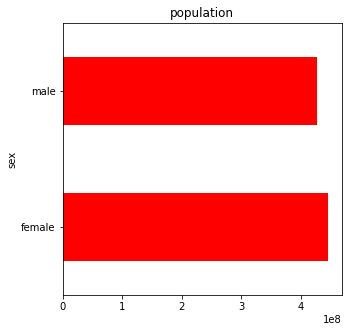

In [19]:
population = south_africa_data.groupby('sex')['population'].sum()
def percent(x):
    return x / population.sum() * 100

def gdp_for_gender(x):
    return x / population.sum() * south_africa_data['gdp_per_capita'].sum()


gdp_per_person = population.apply(gdp_for_gender)

percentage = population.apply(percent)

print("The percentage population by sex is listed below")
print(percentage)
print("------------------------------")
print("The total population by sex is listed below")
print(gdp_per_person)
print("------------------------------")
# print(per_person_percent)
population .plot.barh(subplots=True, figsize=(5,5), color = 'red')

The percentage population by gender is listed below
generation
Boomers            18.520981
G.I. Generation     0.298513
Generation X       26.769333
Generation Z       10.698304
Millenials         35.684231
Silent              8.028638
Name: population, dtype: float64


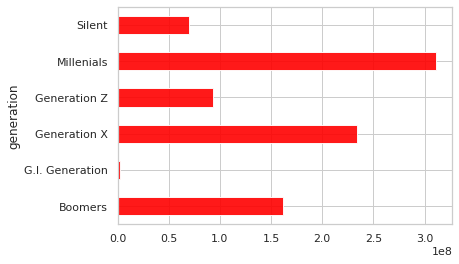

In [182]:
gen_by_pop = south_africa_data.groupby('generation')['population'].sum()
def percent(x):
    return x / gen_by_pop.sum() * 100
percentage = gen_by_pop.apply(percent)
print("The percentage population by gender is listed below")
print(percentage)
gen_by_pop .plot(kind = 'barh', alpha = 0.9, color='red')

The percentage sex by GDP is listed below
sex
female    50.0
male      50.0
Name: gdp_for_year, dtype: float64


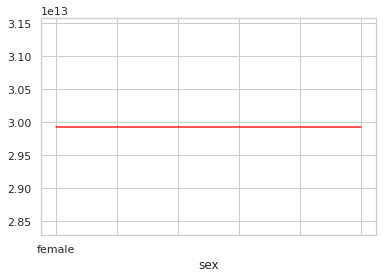

In [183]:
sex_by_gdp = south_africa_data.groupby('sex')['gdp_for_year'].sum()
def percent(x):
    return x / sex_by_gdp.sum() * 100
percentage = sex_by_gdp.apply(percent)
print("The percentage sex by GDP is listed below")
print(percentage)
sex_by_gdp .plot(kind = 'line', alpha = 0.9, color='red')

The percentage population by year is listed below
year
1996    4.326231
1997    4.412645
1998    4.493310
1999    4.570628
2000    4.646333
2001    4.717002
2002    4.787813
2003    4.857842
2004    4.925479
2005    4.989643
2006    5.048391
2007    5.105471
2008    5.002754
2009    5.223393
2010    5.288578
2011    5.360794
2012    5.438390
2013    5.519528
2014    5.601925
2015    5.683852
Name: population, dtype: float64


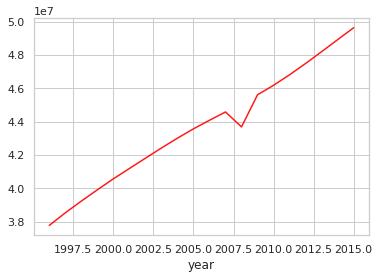

In [184]:
year_by_pop = south_africa_data.groupby('year')['population'].sum()
def percent(x):
    return x / year_by_pop.sum() * 100
percentage = year_by_pop.apply(percent)
print("The percentage population by year is listed below")
print(percentage)
year_by_pop .plot(kind = 'line', alpha = 0.9, color='red')

The percentage population by GDP is listed below
year
1996    3.495840
1997    3.542356
1998    3.141605
1999    3.062886
2000    3.006530
2001    2.641560
2002    2.476966
2003    3.696216
2004    4.761607
2005    5.290276
2006    5.515699
2007    6.000537
2008    5.879775
2009    5.829681
2010    7.270776
2011    7.966723
2012    7.466679
2013    6.809196
2014    6.417390
2015    5.727704
Name: gdp_per_capita, dtype: float64


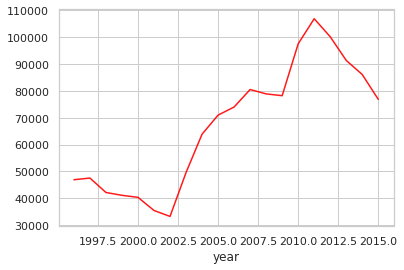

In [185]:
year_by_gdp = south_africa_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print("The percentage population by GDP is listed below")
print(percentage)
year_by_gdp .plot(kind = 'line', alpha = 0.9, color='red')

year
1996    1.953285
1997    1.420571
1998    2.458681
1999    3.810955
2000    3.647043
2001    5.245185
2002    3.223603
2003    3.496790
2004    5.231526
2005    6.255976
2006    7.020899
2007    5.695943
2008    6.023767
2009    5.081273
2010    5.368119
2011    4.890042
2012    6.652097
2013    8.018030
2014    7.922415
2015    6.583800
Name: suicides_no, dtype: float64


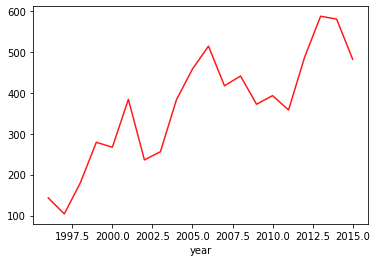

In [24]:
year_by_suicide = south_africa_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x / year_by_suicide.sum() * 100
percentage = year_by_suicide.apply(percent)
# print(year_by_suicide)
print(percentage)
year_by_suicide .plot(kind = 'line', alpha = 0.9, color='red')

The number of suicide by sex is listed below
sex
female    1602
male      5719
Name: suicides_no, dtype: int64
----------------------------------
The percentage suicide by sex is listed below
sex
female    21.882257
male      78.117743
Name: suicides_no, dtype: float64


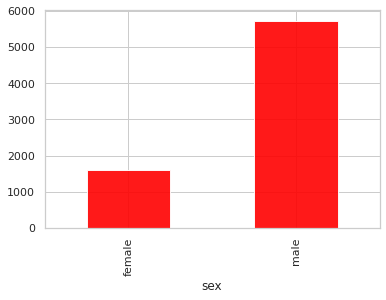

In [188]:
suicide_by_sex = south_africa_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x / suicide_by_sex.sum() * 100
percentage = suicide_by_sex.apply(percent)
print("The number of suicide by sex is listed below")
print(suicide_by_sex)
print("----------------------------------")
print("The percentage suicide by sex is listed below")
print(percentage)
suicide_by_sex.plot(kind = 'bar', alpha = 0.9, color='red')


The population per sex is listed below
age
15-24 years    197204057.0
25-34 years    164969723.0
35-54 years    206323940.0
5-14 years     205834478.0
55-74 years     85167410.0
75+ years       13631154.0
Name: population, dtype: float64
------------------------------------
The population percentage per sex is listed below
age
15-24 years    22.585856
25-34 years    18.894045
35-54 years    23.630360
5-14 years     23.574301
55-74 years     9.754256
75+ years       1.561181
Name: population, dtype: float64


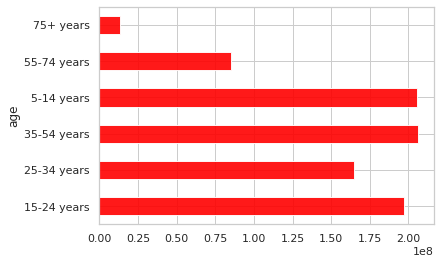

In [189]:
pop_by_sex = south_africa_data.groupby('age')['population'].sum()
def percent(x):
    return x / pop_by_sex.sum() * 100

percentage = pop_by_sex.apply(percent)

print("The population per sex is listed below")
print(pop_by_sex)
print("------------------------------------")
print("The population percentage per sex is listed below")
print(percentage)
pop_by_sex.plot(kind = 'barh', alpha = 0.9, color = 'red')

The total suicide by age is listed below
age
15-24 years    2034
25-34 years    2160
35-54 years    2102
5-14 years      163
55-74 years     691
75+ years       171
Name: suicides_no, dtype: int64
------------------------------
The percentage suicide by age is listed below
age
15-24 years    27.783090
25-34 years    29.504166
35-54 years    28.711925
5-14 years      2.226472
55-74 years     9.438601
75+ years       2.335746
Name: suicides_no, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988e2a0250>],
      dtype=object)

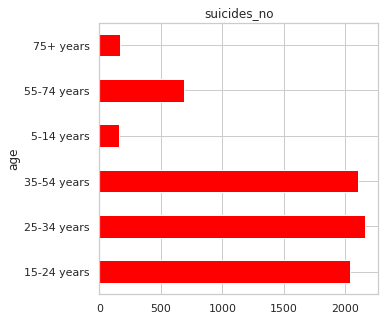

In [191]:
age = south_africa_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / age.sum() * 100
percentage = age.apply(percent)
print("The total suicide by age is listed below")
print(age)
print("------------------------------")
print("The percentage suicide by age is listed below")
print(percentage)
age .plot.barh(subplots=True, figsize=(5,5), color = 'red')

The percentage year by GDP is listed below
year
1996    3.495840
1997    3.542356
1998    3.141605
1999    3.062886
2000    3.006530
2001    2.641560
2002    2.476966
2003    3.696216
2004    4.761607
2005    5.290276
2006    5.515699
2007    6.000537
2008    5.879775
2009    5.829681
2010    7.270776
2011    7.966723
2012    7.466679
2013    6.809196
2014    6.417390
2015    5.727704
Name: gdp_per_capita, dtype: float64


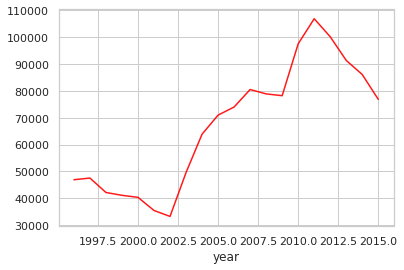

In [195]:
year_by_gdp = south_africa_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print("The percentage year by GDP is listed below")
print(percentage)
year_by_gdp .plot(kind = 'line', alpha = 0.9, color='red')

The percentage syear by GDP is listed below
age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: gdp_for_year, dtype: float64


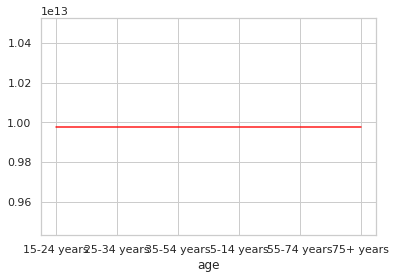

In [196]:
year_by_gdp = south_africa_data.groupby('age')['gdp_for_year'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print("The percentage syear by GDP is listed below")
print(percentage)
year_by_gdp .plot(kind = 'line', alpha = 0.9, color='red')

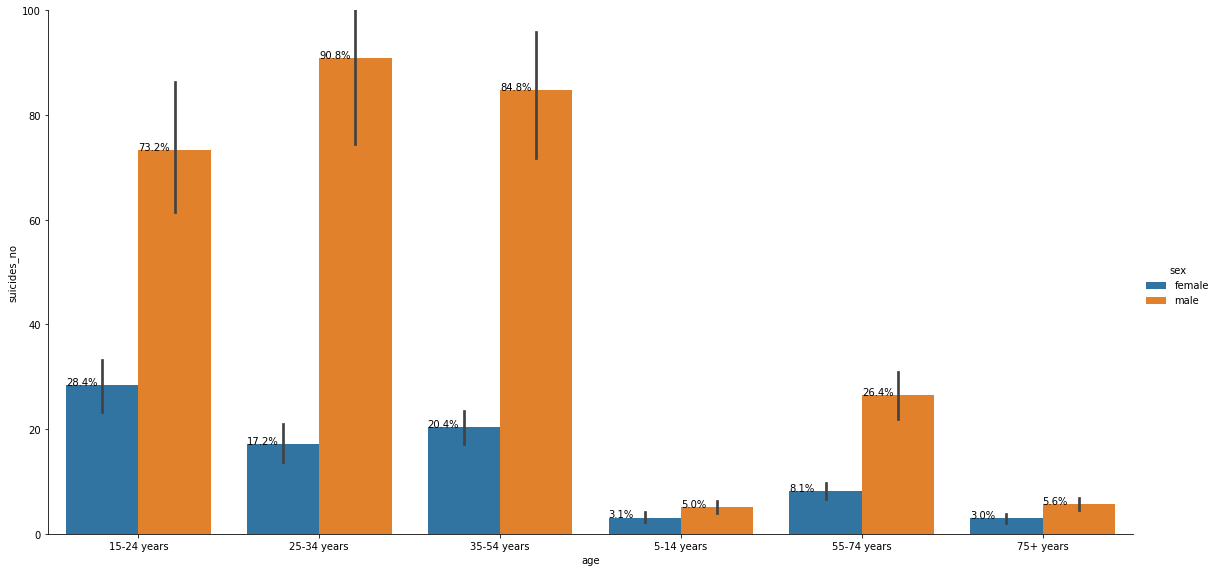

In [30]:
g = sns.catplot(x="age", y="suicides_no", hue='sex', kind='bar', data=south_africa_data, height=8, aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

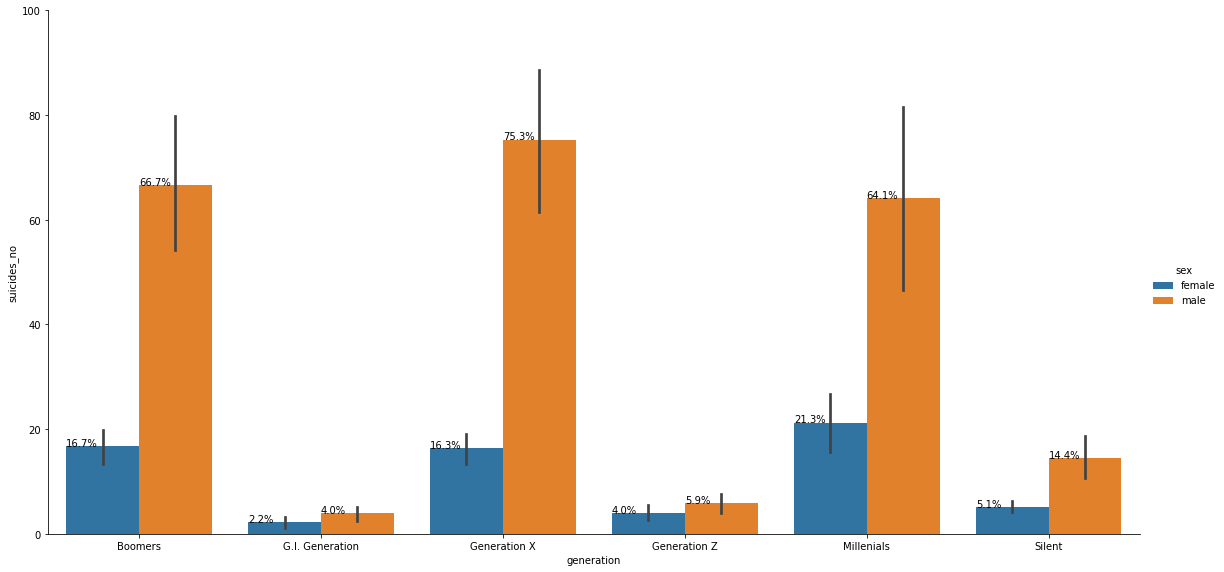

In [31]:
g = sns.catplot(x="generation", y="suicides_no", hue='sex', kind='bar', data=south_africa_data, height=8, aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

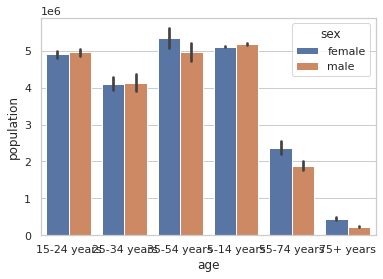

In [32]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="population", hue="sex", data=south_africa_data)

The total year by GDP is listed below
age
15-24 years    223580
25-34 years    223580
35-54 years    223580
5-14 years     223580
55-74 years    223580
75+ years      223580
Name: gdp_per_capita, dtype: int64
The percentage year by GDP is listed below
age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: gdp_per_capita, dtype: float64


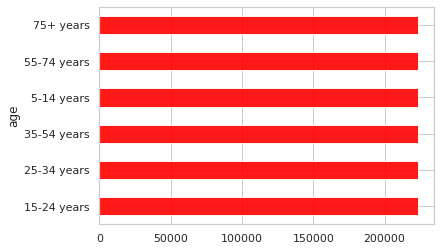

In [197]:
age_by_gdp = south_africa_data.groupby('age')['gdp_per_capita'].sum()
def percent(x):
    return x / age_by_gdp.sum() * 100
percentage = age_by_gdp.apply(percent)
print("The total age by GDP is listed below")
print(age_by_gdp)
print("The percentage age by GDP is listed below")
print(percentage)
age_by_gdp.plot(kind = 'barh', alpha = 0.9, color='red')

The total group suicide rate by generation is listed below
generation
Boomers            1585
G.I. Generation      31
Generation X       2382
Generation Z         89
Millenials         2647
Silent              587
Name: suicides_no, dtype: int64
--------------------------------------------------------------
The percentage group suicide rate by generation is listed below
generation
Boomers            21.650048
G.I. Generation     0.423439
Generation X       32.536539
Generation Z        1.215681
Millenials         36.156263
Silent              8.018030
Name: suicides_no, dtype: float64


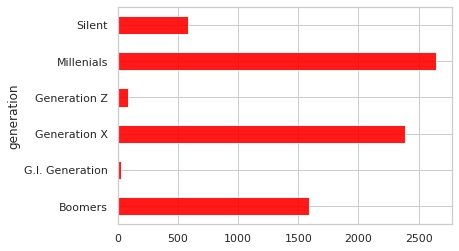

In [198]:
group_suicide_rate_by_generation = south_africa_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / group_suicide_rate_by_generation.sum() * 100
percentage = group_suicide_rate_by_generation.apply(percent)
print("The total group suicide rate by generation is listed below")
print(group_suicide_rate_by_generation)
print("--------------------------------------------------------------")
print("The percentage group suicide rate by generation is listed below")
print(percentage)
group_suicide_rate_by_generation .plot(kind = 'barh', alpha = 0.9, color='red')

The total generation by gdp is listed below
generation
Boomers            207324
G.I. Generation     36330
Generation X       276166
Generation Z       132736
Millenials         354978
Silent             333946
Name: gdp_per_capita, dtype: int64
--------------------------------------------------------
The percentage generation by gdp is listed below
generation
Boomers            15.454871
G.I. Generation     2.708203
Generation X       20.586665
Generation Z        9.894743
Millenials         26.461669
Silent             24.893849
Name: gdp_per_capita, dtype: float64


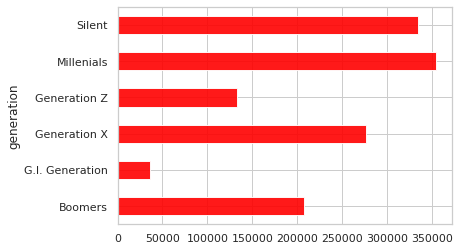

In [200]:
generation_by_gdp = south_africa_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / generation_by_gdp.sum() * 100
percentage = generation_by_gdp.apply(percent)
print("The total generation by gdp is listed below")
print(generation_by_gdp)
print("--------------------------------------------------------")
print("The percentage generation by gdp is listed below")
print(percentage)
generation_by_gdp .plot(kind = 'barh', alpha = 0.9, color='red')

The total hdi by generation is listed below
generation
Boomers             7.768
G.I. Generation     1.264
Generation X       11.604
Generation Z        6.564
Millenials         15.558
Silent             11.566
Name: hdi_for_year, dtype: float64
----------------------------------------------------
The percentage hdi by generation is listed below
generation
Boomers            14.299389
G.I. Generation     2.326780
Generation X       21.360725
Generation Z       12.083057
Millenials         28.639275
Silent             21.290774
Name: hdi_for_year, dtype: float64


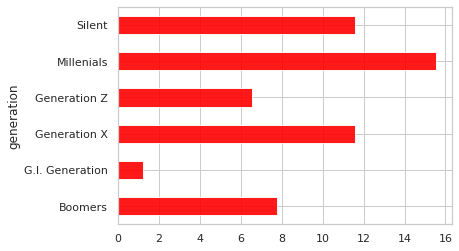

In [201]:
generation_by_hdi = south_africa_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
        return x / generation_by_hdi.sum() * 100
percentage = generation_by_hdi.apply(percent)
print("The total hdi by generation is listed below")
print(generation_by_hdi)
print("----------------------------------------------------")
print("The percentage hdi by generation is listed below")
print(percentage)
# print(group_suicide_rate_by_generation)
generation_by_hdi .plot(kind = 'barh', alpha = 0.9, color='red')

The total population by generation is listed below
generation
Boomers            161712386.0
G.I. Generation      2606412.0
Generation X       233731277.0
Generation Z        93410181.0
Millenials         311569996.0
Silent              70100510.0
Name: population, dtype: float64
----------------------------------------------------------
The percentage population by generation is listed below
generation
Boomers            18.520981
G.I. Generation     0.298513
Generation X       26.769333
Generation Z       10.698304
Millenials         35.684231
Silent              8.028638
Name: population, dtype: float64


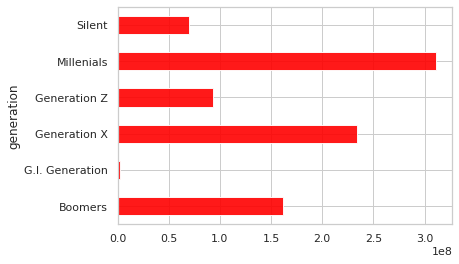

In [202]:
gen_by_population = south_africa_data.groupby('generation')['population'].sum()
def percent(x):
        return x / gen_by_population.sum() * 100
percentage = gen_by_population.apply(percent)
print("The total population by generation is listed below")
print(gen_by_population)
print("----------------------------------------------------------")
print("The percentage population by generation is listed below")
print(percentage)
gen_by_population .plot(kind = 'barh', alpha = 0.9, color='red')

# Inferential Statistics

<function matplotlib.pyplot.show>

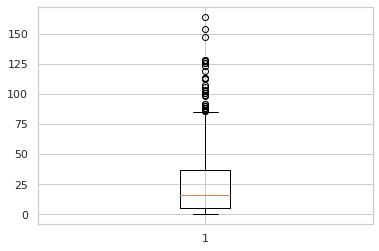

In [39]:
plt.boxplot(south_africa_data.suicides_no)
plt.show

In [40]:
# south_africa_kruskal = pd.crosstab(index=south_africa_data['suicides_no'], columns=south_africa_data['generation'], margins=True)
# south_africa_kruskal

In [41]:
south_africa_data.describe()

,year,population,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,240.000000,2.400000e+02,240.000000,2.400000e+02,240.000000,240.000000
mean,2005.500000,3.638045e+06,0.226350,2.494661e+11,5589.500000,30.504167
std,5.778332,1.852812e+06,0.309284,9.990642e+10,1906.370492,36.193459
min,1996.000000,1.673280e+05,0.000000,1.157481e+11,2769.000000,0.000000
25%,2000.750000,2.065201e+06,0.000000,1.451496e+11,3809.000000,5.000000
50%,2005.500000,4.483700e+06,0.000000,2.647413e+11,6040.000000,16.000000
75%,2010.250000,5.099549e+06,0.634750,3.260319e+11,6824.500000,37.250000
max,2015.000000,6.396045e+06,0.666000,4.168782e+11,8906.000000,164.000000


In [42]:
data_1 = south_africa_data.generation
data_2 = south_africa_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=362.663, p=0.000
Probably different distributions


In [43]:
data_1 = south_africa_data.sex
data_2 = south_africa_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=372.173, p=0.000
Probably different distributions


In [44]:
data_1 = south_africa_data.generation
data_2 = south_africa_data.sex
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=373.126, p=0.000
Probably different distributions


In [45]:
data_1 = south_africa_data.population
data_2 = south_africa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.298, p=0.000
Probably different distributions


In [46]:
data_1 = south_africa_data.gdp_per_capita
data_2 = south_africa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.198, p=0.002
Probably different distributions


In [47]:
data_1 = south_africa_data.hdi_for_year
data_2 = south_africa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.130, p=0.044
Probably different distributions


In [48]:
data_1 = south_africa_data.gdp_for_year
data_2 = south_africa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.203, p=0.002
Probably different distributions


# Japan..asia

Japan, a country that resides in the heart of the continent of Asia has a population of 3,680,217,942. This population which is made up of 51.2% and 48.7% female. The country has a growing population of 0.01% annually on the average, a gross domestic product of product per capita of #36397 and an average annual increase of 0.1%. However, with her growing population and growing gross domestic products per capita, the country records a high suicide rate. A proper investigation reveals that 68% of the suicide rate is carried out by the male gender. We also discovered that the rate of suicide was on the high side until 2003 when the country started experiencing a free fall of suicide. Also, a closer examination of the data reveals that ages between 25-34years pooled a percentage of 29% suicide rate, 35-54years 28%, 15-24years at 27.8% and 55-74years at 9%. Also, insights gathered on the data reveals that ages between 35-54 years and 55-74years contribute to 29% and 24% respectively. The questions begging for answers include;

a. Why the free fall in suicide rate from 2003?

b. What are the possible recommendations and solutions to further help in curbing the rate of suicide in south Africa?


A closer examination of the data reveals that japan is populated by those between 35-54years and 55-74years at 29% and 24% respectively. We see a movement of gross domestic product per capita enjoyed by the G.I generation(those born between 1901 - 1927) from 9% to 22% as this should translate to better living standard and education since HDI moved from 9% to 20% instead, we saw a sharp increase in population from 6% to 27%!( four times the previous population). As a result of this, the prosperity could not cater for the needs of the people which results also to a sharp increase of suicide from 11% to 36.9%. After the silent generation, the Boomers emerged(1946-1964). Due to what happened previously, the economy was trying to rebound from the shock hence a decrease in GDP per capita from 22% to 18%. This is not far from the fact that the population decreased from 27% to 26.7% which translates to decrease in HDI from 20% to 14%. From 1965 - 1980, there was an increase in GDP per capita back to what it was in the silent generation. This results to a decrease in suicide from 29.9% to 16% and an HDI of 14% to 24.7%. This can be attributed to the decrease in population from 26.7% to 23%. However, between 1981 and 1996(millenials generation), There was a drop in the GDP per capita from 22% to 21%. This is as a result of the drop in population from 23% to 13% hence a drop in suicide from 16% to 5%! It appears that the government and people of Japan have discovered a secret which is birth control. 

Looking at the generation; Generation Z(1997 - 2012) as at that filing of this data, the population has dropped from 13% to 2%! which translates to a drop in suicide from 5% to 0%! yet the HDI has dropped from 22% to 8% and gdp per capita from 21% to 5%. The reason for this is not far fetched. Japan is population with citizens between 55 -74years(24%) and 35-54years(29%). Remember that the generation between 55-74years(silent generation) had the highest population of 27% hence a lower working population at this present time which should cater for the economic need of the country.

Possible recommendations include
a. Allow for free migrants from other countries into the country who will contribute to the economic growth of the country while implementing a policy on birth control. As the country grow economically as a result of inputs by migrants, there is a policy to regulate birth.

b. Invest in education and health care so that the migrants can work and then get better working condition in terms of health services

In [49]:
japan_data = new_dataset[(new_dataset['country'] == 'Japan')]
japan_data.tail(2)

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
13734,Japan,2015,male,5-14 years,5553851.0,1.12,0.0,4394977752878,36510,Generation Z,62,infant_teen
13735,Japan,2015,female,5-14 years,5287719.0,0.53,0.0,4394977752878,36510,Generation Z,28,infant_teen


In [50]:
japan_data.columns

Index(['country', 'year', 'sex', 'age', 'population', 'suicides/100k pop',
       'hdi_for_year', 'gdp_for_year', 'gdp_per_capita', 'generation',
       'suicides_no', 'age_category'],
      dtype='object')

In [51]:
japan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 13364 to 13735
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            372 non-null    category
 1   year               372 non-null    int64   
 2   sex                372 non-null    category
 3   age                372 non-null    category
 4   population         372 non-null    float64 
 5   suicides/100k pop  372 non-null    float64 
 6   hdi_for_year       372 non-null    float64 
 7   gdp_for_year       372 non-null    int64   
 8   gdp_per_capita     372 non-null    int64   
 9   generation         372 non-null    category
 10  suicides_no        372 non-null    int64   
 11  age_category       372 non-null    category
dtypes: category(5), float64(3), int64(4)
memory usage: 30.7 KB


In [52]:
japan_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,9.895228e+06,21.573199,0.277839,4.339221e+12,36397.548387,2169.091398
std,8.956318,4.738393e+06,17.576106,0.403628,1.080937e+12,8654.622419,2170.876295
min,1985.000000,1.791000e+06,0.190000,0.000000,1.398893e+12,12401.000000,12.000000
25%,1992.000000,6.317392e+06,8.855000,0.000000,3.908809e+12,33320.000000,641.500000
50%,2000.000000,8.469400e+06,16.820000,0.000000,4.515265e+12,37534.000000,1641.000000
75%,2008.000000,1.472475e+07,33.787500,0.838000,4.907039e+12,41563.000000,2585.250000
max,2015.000000,1.836200e+07,78.770000,0.891000,6.203213e+12,51379.000000,8948.000000


The total population by sex is listed below
sex
female    1.884787e+09
male      1.796237e+09
Name: population, dtype: float64
--------------------------------------------------
The percentage population by sex is listed below
sex
female    51.202792
male      48.797208
Name: population, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9890a3bc90>],
      dtype=object)

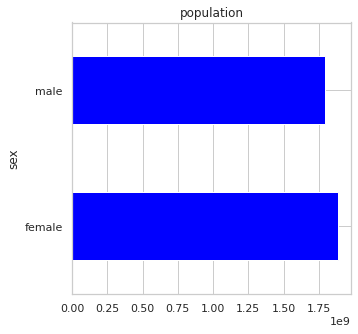

In [203]:
population = japan_data.groupby('sex')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print("The total population by sex is listed below")
print(population)
print("--------------------------------------------------")
print("The percentage population by sex is listed below")
print(percentage)
population .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

The total suicide by sex is listed below
sex
female    251630
male      555272
Name: suicides_no, dtype: int64
--------------------------------------------------
The percentage suicide by sex is listed below
sex
female    31.184704
male      68.815296
Name: suicides_no, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988de2d850>],
      dtype=object)

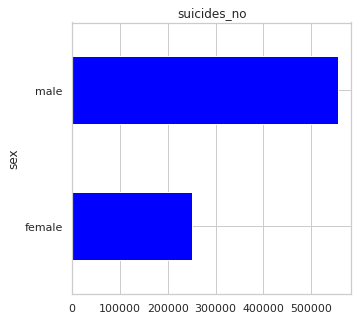

In [205]:
suicide = japan_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print("The total suicide by sex is listed below")
print(suicide)
print("--------------------------------------------------")
print("The percentage suicide by sex is listed below")
print(percentage)
suicide .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

The percentage population by sex is listed below
year
1985    3.064614
1986    3.088243
1987    3.108265
1988    3.126874
1989    3.144939
1990    3.158126
1991    3.173084
1992    3.186911
1993    3.198430
1994    3.207368
1995    3.215124
1996    3.226955
1997    3.234425
1998    3.241978
1999    3.247465
2000    3.253242
2001    3.261755
2002    3.265096
2003    3.270692
2004    3.273545
2005    3.277824
2006    3.279032
2007    3.279087
2008    3.276316
2009    3.273436
2010    3.290585
2011    3.285145
2012    3.279929
2013    3.273925
2014    3.267405
2015    3.270185
Name: population, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dd87810>],
      dtype=object)

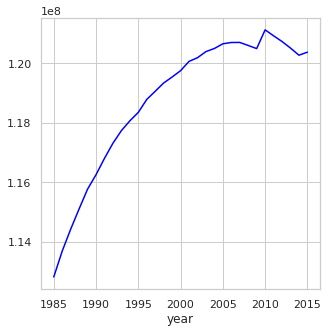

In [206]:
population = japan_data.groupby('year')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print("The percentage population by sex is listed below")
# print(population)
print(percentage)
population .plot.line(subplots=True, figsize=(5,5), color = 'blue')

The percentage suicide by year is listed below
year
1985    2.882258
1986    3.158252
1987    2.932574
1988    2.810255
1989    2.604158
1990    2.478864
1991    2.451351
1992    2.572307
1993    2.522363
1994    2.570820
1995    2.633405
1996    2.722388
1997    2.885109
1998    3.898615
1999    3.856106
2000    3.716560
2001    3.610352
2002    3.682603
2003    3.951037
2004    3.722137
2005    3.763654
2006    3.689296
2007    3.800338
2008    3.726971
2009    3.782739
2010    3.644928
2011    3.564993
2012    3.264089
2013    3.221085
2014    3.018582
2015    2.861810
Name: suicides_no, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dd35150>],
      dtype=object)

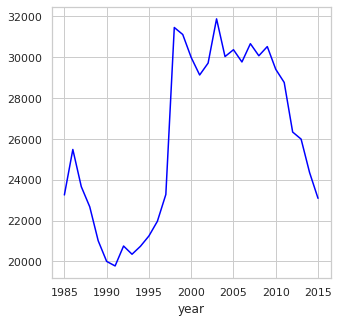

In [207]:
suicide = japan_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print("The percentage suicide by year is listed below")
print(percentage)
suicide .plot.line(subplots=True, figsize=(5,5), color = 'blue')

The percentage gdp by year is listed below
year
1985    1.099064
1986    1.620811
1987    1.961936
1988    2.365189
1989    2.338779
1990    2.388410
1991    2.719786
1992    2.953052
1993    3.352938
1994    3.683605
1995    4.080654
1996    3.606500
1997    3.286290
1998    2.994796
1999    3.382362
2000    3.617135
2001    3.176658
2002    3.034501
2003    3.272642
2004    3.541536
2005    3.492968
2006    3.326527
2007    3.315360
2008    3.702217
2009    3.847742
2010    4.170699
2011    4.512800
2012    4.553568
2013    3.791553
2014    3.574151
2015    3.235773
Name: gdp_per_capita, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dda0e90>],
      dtype=object)

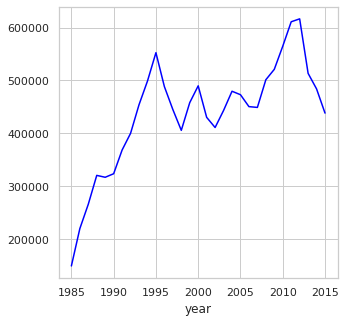

In [208]:
gdp = japan_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print("The percentage gdp by year is listed below")
print(percentage)
gdp .plot.line(subplots=True, figsize=(5,5), color = 'blue')

The percentage population by age is listed below
age
15-24 years    13.144717
25-34 years    13.806101
35-54 years    29.394065
5-14 years     11.286118
55-74 years    24.166206
75+ years       8.202793
Name: population, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dc4f710>],
      dtype=object)

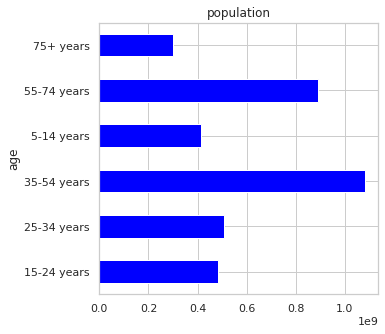

In [209]:
population = japan_data.groupby('age')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print("The percentage population by age is listed below")
print(percentage)
population .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

age
15-24 years     52288
25-34 years     94529
35-54 years    278679
5-14 years       2130
55-74 years    272705
75+ years      106571
Name: suicides_no, dtype: int64
The percentage suicide by age is listed below
age
15-24 years     6.480093
25-34 years    11.715053
35-54 years    34.536908
5-14 years      0.263973
55-74 years    33.796545
75+ years      13.207428
Name: suicides_no, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dc3da10>],
      dtype=object)

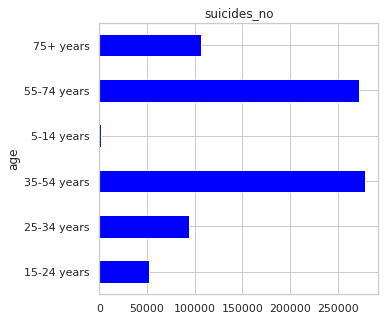

In [210]:
suicide = japan_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(suicide)
print("The percentage suicide by age is listed below")
print(percentage)
suicide .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

The total gdp by age is listed below
age
15-24 years    2256648
25-34 years    2256648
35-54 years    2256648
5-14 years     2256648
55-74 years    2256648
75+ years      2256648
Name: gdp_per_capita, dtype: int64
--------------------------------------------
The percentage gdp by age is listed below
age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: gdp_per_capita, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988dbf75d0>],
      dtype=object)

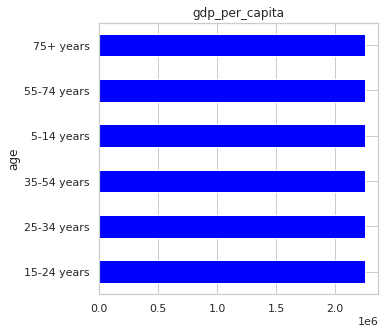

In [211]:
gdp = japan_data.groupby('age')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print("The total gdp by age is listed below")
print(gdp)
print("--------------------------------------------")
print("The percentage gdp by age is listed below")
print(percentage)
gdp .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

age
15-24 years    17.226
25-34 years    17.226
35-54 years    17.226
5-14 years     17.226
55-74 years    17.226
75+ years      17.226
Name: hdi_for_year, dtype: float64
age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: hdi_for_year, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9890cb2c10>],
      dtype=object)

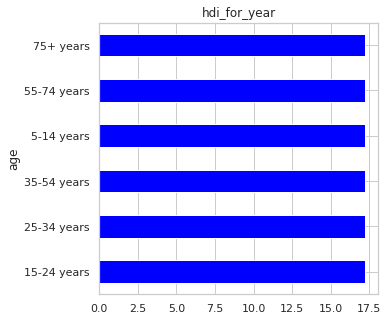

In [61]:
population = japan_data.groupby('age')['hdi_for_year'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(population)
print(percentage)
population .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

The total suicide by age is listed below
age
15-24 years    2034
25-34 years    2160
35-54 years    2102
5-14 years      163
55-74 years     691
75+ years       171
Name: suicides_no, dtype: int64
---------------------------------------------------
The total suicide by age is listed below
age
15-24 years    27.783090
25-34 years    29.504166
35-54 years    28.711925
5-14 years      2.226472
55-74 years     9.438601
75+ years       2.335746
Name: suicides_no, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988db2ae50>],
      dtype=object)

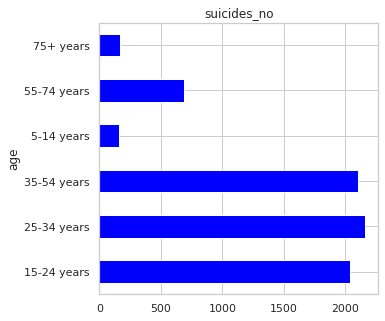

In [212]:
suicide = south_africa_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print("The total suicide by age is listed below")
print(suicide)
print("---------------------------------------------------")
print("The total suicide by age is listed below")
print(percentage)
suicide .plot.barh(subplots=True, figsize=(5,5), color = 'blue')

Total hdi by generation
generation
Boomers            15.458
G.I. Generation     9.810
Generation X       25.594
Generation Z        8.878
Millenials         22.874
Silent             20.742
Name: hdi_for_year, dtype: float64
------------------------------------------
percentage hdi by generation
generation
Boomers            14.956074
G.I. Generation     9.491466
Generation X       24.762955
Generation Z        8.589729
Millenials         22.131274
Silent             20.068501
Name: hdi_for_year, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f988db23850>],
      dtype=object)

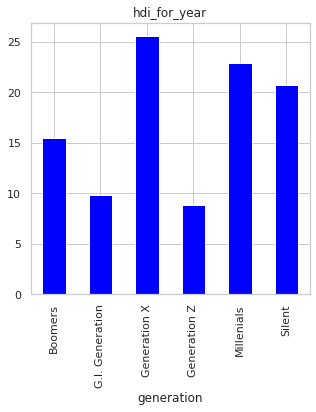

In [213]:
hdi = japan_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print("Total hdi by generation")
print(hdi)
print("------------------------------------------")
print("percentage hdi by generation")
print(percentage)
hdi .plot.bar(subplots=True, figsize=(5,5), color = 'blue')

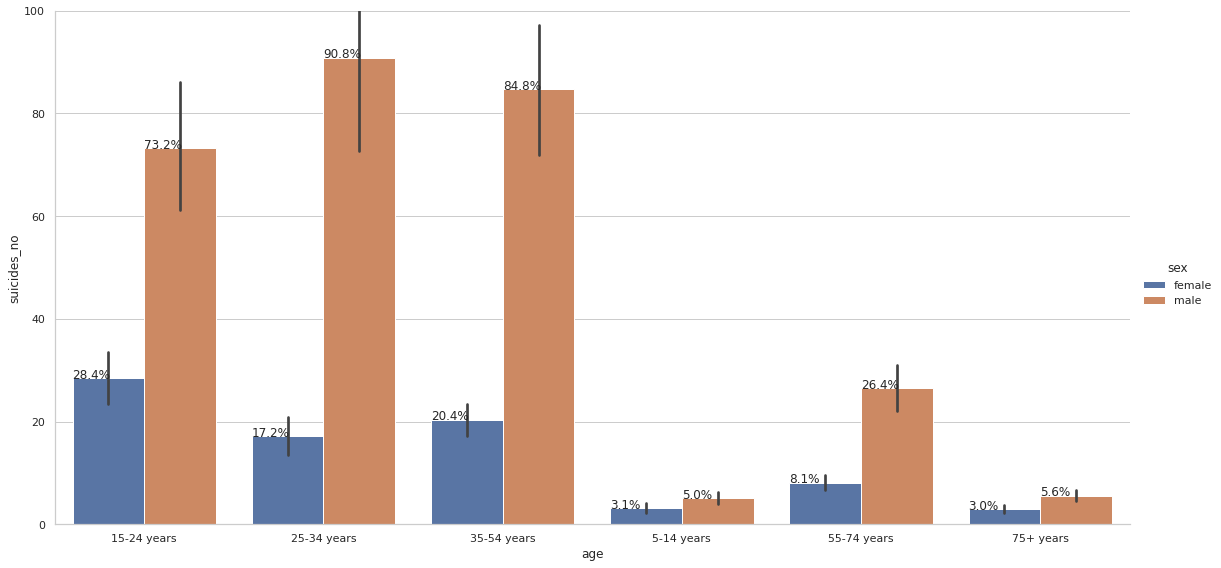

In [64]:
g = sns.catplot(x="age", y="suicides_no", hue='sex', kind='bar', data=south_africa_data, height=8, aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

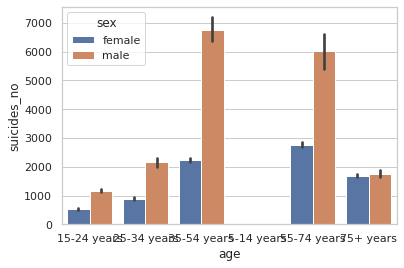

In [65]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="suicides_no", hue="sex", data=japan_data)


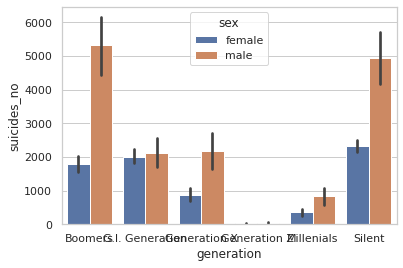

In [66]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="suicides_no", hue="sex", data=japan_data)

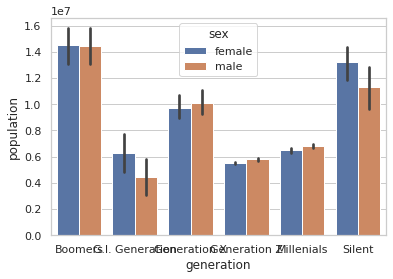

In [67]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="population", hue="sex", data=japan_data)

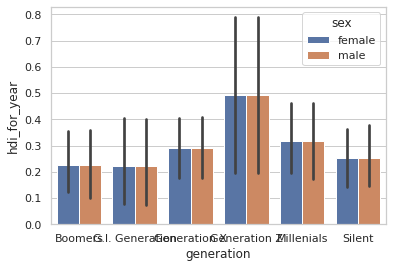

In [68]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="hdi_for_year", hue="sex", data=japan_data)

Total gdp by generation
generation
Boomers            2449336
G.I. Generation    1291378
Generation X       3089636
Generation Z        783144
Millenials         2882608
Silent             3043786
Name: gdp_per_capita, dtype: int64
----------------------------------------
percentage gdp by generation
generation
Boomers            18.089780
G.I. Generation     9.537583
Generation X       22.818771
Generation Z        5.783977
Millenials         21.289748
Silent             22.480142
Name: gdp_per_capita, dtype: float64


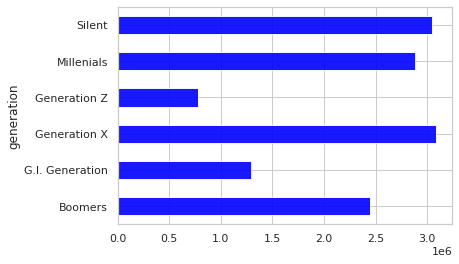

In [214]:
generation_by_gdp = japan_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / generation_by_gdp.sum() * 100
percentage = generation_by_gdp.apply(percent)
print("Total gdp by generation")
print(generation_by_gdp)
print("----------------------------------------")
print("percentage gdp by generation")
print(percentage)
generation_by_gdp .plot(kind = 'barh', alpha = 0.9, color='blue')

Total generation by suicide
generation
Boomers            241420
G.I. Generation     90657
Generation X       133292
Generation Z          657
Millenials          42991
Silent             297885
Name: suicides_no, dtype: int64
-----------------------------------------------
percentage generation by suicide
generation
Boomers            29.919371
G.I. Generation    11.235193
Generation X       16.518982
Generation Z        0.081423
Millenials          5.327908
Silent             36.917123
Name: suicides_no, dtype: float64


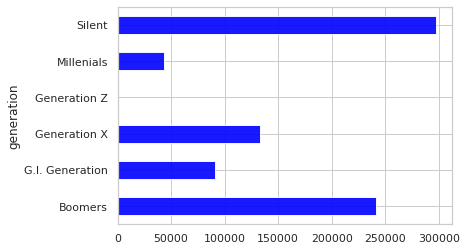

In [215]:
generation_by_suicide = japan_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / generation_by_suicide.sum() * 100
percentage = generation_by_suicide.apply(percent)
print("Total generation by suicide")
print(generation_by_suicide)
print("-----------------------------------------------")
print("percentage generation by suicide")
print(percentage)
generation_by_suicide .plot(kind = 'barh', alpha = 0.9, color='blue')

Total hdi by generation
generation
Boomers            15.458
G.I. Generation     9.810
Generation X       25.594
Generation Z        8.878
Millenials         22.874
Silent             20.742
Name: hdi_for_year, dtype: float64
-----------------------------------------
percentage hdi by generation
generation
Boomers            14.956074
G.I. Generation     9.491466
Generation X       24.762955
Generation Z        8.589729
Millenials         22.131274
Silent             20.068501
Name: hdi_for_year, dtype: float64


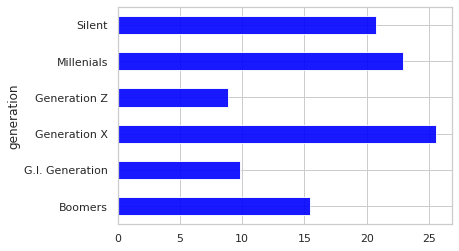

In [216]:
generation_by_hdi = japan_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / generation_by_hdi.sum() * 100
percentage = generation_by_hdi.apply(percent)
print("Total hdi by generation")
print(generation_by_hdi)
print("-----------------------------------------")
print("percentage hdi by generation")
print(percentage)
generation_by_hdi .plot(kind = 'barh', alpha = 0.9, color='blue')

percentage populationi by generation
generation
Boomers            26.775541
G.I. Generation     6.415856
Generation X       23.712398
Generation Z        2.763873
Millenials         13.002451
Silent             27.329882
Name: population, dtype: float64


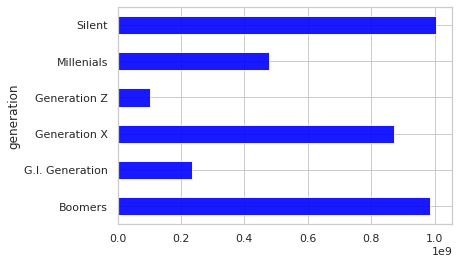

In [217]:
generation_by_pop = japan_data.groupby('generation')['population'].sum()
def percent(x):
    return x / generation_by_pop.sum() * 100
percentage = generation_by_pop.apply(percent)
print("percentage populationi by generation")
print(percentage)
generation_by_pop .plot(kind = 'barh', alpha = 0.9, color='blue')

# Inferential Statistics

In [73]:
data_1 = japan_data.generation
data_2 = japan_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=561.946, p=0.000
Probably different distributions


In [74]:
data_1 = japan_data.generation
data_2 = japan_data.sex
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=578.141, p=0.000
Probably different distributions


In [75]:
data_1 = japan_data.sex
data_2 = japan_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=577.295, p=0.000
Probably different distributions


In [76]:
data_1 = japan_data.population
data_2 = japan_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.629, p=0.000
Probably different distributions


In [77]:
data_1 = japan_data.gdp_per_capita
data_2 = japan_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.036, p=0.489
Probably the same distribution


In [78]:
data_1 = japan_data.hdi_for_year
data_2 = japan_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.017, p=0.739
Probably the same distribution


## United Kingdom...Europe

The United Kingdom of Great Britain and Northern Ireland, commonly known as the United Kingdom (UK) or Britain, is a sovereign country in north-western Europe, off the north-western coast of the European mainland. According to our data, it has a population of 1,738,767,780. This population which is made up of 51% and 48.8% male has an annual growing population of 0.01% on the average, boast of gross domestic products per capita of #31908 and an annual increase of 0.6%.

A close examination of the data revealed that there is a relationship between population and suicide rate in united kingdom. The data revealed that between 1901 and 1964, the population increased from 7.5% to 26.6% while suicide increased from10% to 34%. As the country approaches millenial, the population decreased from 26.6% to 3.7% while the suicide rate also decreased from 34% to 0%(as at when this data was collected).

Also, we discovered that from the boomer generation to millenial generation,
there was an increase in GDp per capita while suicide rate decreases during those period. Inasmuch as the drop in suicide is not caused by rise in GDP per capita, we can say that there is a strong relationship between both variables. Could the relationships be by chance?

As to why the male are the most 'beneficiaries' of suicide rate, the highest rate is within the working population. This population has the responsibility to take care of the family hence when they could cont meet such expectation, they felt depressed and suicide took over. We recommend that the working population should be adequately taken care of, proper investment in the aspect of provision of employment opportunuties, better living standards, health sector improvement and proper education and enlightenment.  



In [79]:
uk_data = (new_dataset[new_dataset['country'] == 'United Kingdom'])
uk_data.head(2)

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
26476,United Kingdom,1985,male,75+ years,1202838.0,21.95,0.753,489285164271,9231,G.I. Generation,264,elderly
26477,United Kingdom,1985,male,55-74 years,5170113.0,17.70,0.753,489285164271,9231,G.I. Generation,915,full_adult


In [80]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 26476 to 26847
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country            372 non-null    category
 1   year               372 non-null    int64   
 2   sex                372 non-null    category
 3   age                372 non-null    category
 4   population         372 non-null    float64 
 5   suicides/100k pop  372 non-null    float64 
 6   hdi_for_year       372 non-null    float64 
 7   gdp_for_year       372 non-null    int64   
 8   gdp_per_capita     372 non-null    int64   
 9   generation         372 non-null    category
 10  suicides_no        372 non-null    int64   
 11  age_category       372 non-null    category
dtypes: category(5), float64(3), int64(4)
memory usage: 30.7 KB


In [81]:
uk_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,4.674107e+06,7.502473,0.278548,1.816067e+12,31908.354839,367.755376
std,8.956318,1.902560e+06,6.113924,0.405389,7.820394e+11,12736.016607,379.698095
min,1985.000000,1.202838e+06,0.000000,0.000000,4.892852e+11,9231.000000,0.000000
25%,1992.000000,3.620903e+06,2.812500,0.000000,1.140490e+12,20927.000000,97.000000
50%,2000.000000,4.121212e+06,4.845000,0.000000,1.647951e+12,29508.000000,236.000000
75%,2008.000000,5.810017e+06,12.407500,0.837000,2.619700e+12,44491.000000,542.500000
max,2015.000000,8.881944e+06,23.990000,0.907000,3.074360e+12,53576.000000,1743.000000


Year by population
year
1985    3.048511
1986    3.055010
1987    3.061919
1988    3.066009
1989    3.072586
1990    3.080219
1991    3.100094
1992    3.110039
1993    3.121980
1994    3.134248
1995    3.148607
1996    3.163862
1997    3.178494
1998    3.193490
1999    3.211087
2000    3.228373
2001    3.196056
2002    3.215435
2003    3.230550
2004    3.246840
2005    3.267200
2006    3.283425
2007    3.300197
2008    3.317486
2009    3.336475
2010    3.358903
2011    3.386413
2012    3.433962
2013    3.455999
2014    3.483529
2015    3.513002
Name: population, dtype: float64


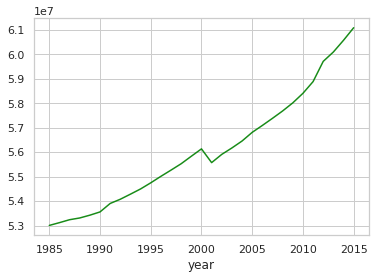

In [218]:
year_by_pop = uk_data.groupby('year')['population'].sum()
def percent(x):
    return x / year_by_pop.sum() * 100
percentage = year_by_pop.apply(percent)
print("Year by population")
print(percentage)
year_by_pop.plot(kind = 'line', alpha = 0.9, color = 'green')

percentage gdp by year
year
1985    0.933217
1986    1.144710
1987    1.414939
1988    1.725911
1989    1.753914
1990    2.063470
1991    2.143336
1992    2.205409
1993    1.976730
1994    2.115636
1995    2.465630
1996    2.588967
1997    2.839887
1998    2.983140
1999    3.015895
2000    2.967976
2001    2.949880
2002    3.197666
2003    3.668672
2004    4.295164
2005    4.485831
2006    4.767990
2007    5.416318
2008    5.066021
2009    4.152416
2010    4.225610
2011    4.497861
2012    4.507364
2013    4.609370
2014    5.045296
2015    4.775774
Name: gdp_per_capita, dtype: float64


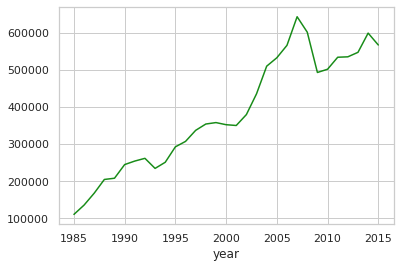

In [282]:
year_by_gdp = uk_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print("percentage gdp by year")
print(percentage)
year_by_gdp.plot(kind = 'line', alpha = 0.9, color = 'green')

generation
Boomers            14.917970
G.I. Generation     9.175835
Generation X       24.645821
Generation Z        8.718394
Millenials         22.408801
Silent             20.133179
Name: hdi_for_year, dtype: float64


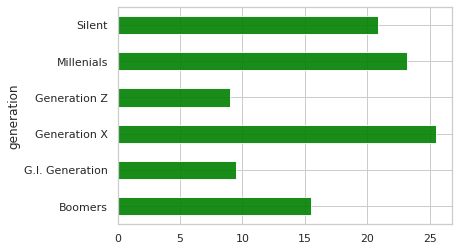

In [221]:
hdi = uk_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind = 'barh', alpha = 0.9, color = 'green')

percentage year by suicide
year
1985    3.731589
1986    3.537151
1987    3.358064
1988    3.633639
1989    3.187749
1990    3.393882
1991    3.323709
1992    3.382917
1993    3.261577
1994    3.201637
1995    3.154124
1996    3.044479
1997    3.028398
1998    3.208216
1999    3.251343
2000    3.135850
2001    3.017434
2002    3.009393
2003    2.908519
2004    3.057637
2005    2.958225
2006    3.013048
2007    2.848580
2008    3.113190
2009    3.103688
2010    3.061292
2011    3.211140
2012    3.248419
2013    3.526187
2014    3.499872
2015    3.589050
Name: suicides_no, dtype: float64


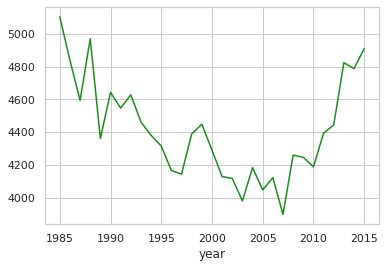

In [223]:
year_by_suicide = uk_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x / year_by_suicide.sum() * 100
percentage = year_by_suicide.apply(percent)
print("percentage year by suicide")
print(percentage)
year_by_suicide.plot(kind = 'line', alpha = 0.9, color = 'green')

The population percentage per age is listed below
generation
Boomers            17.369250
G.I. Generation     7.229155
Generation X       21.687211
Generation Z        7.049339
Millenials         22.960785
Silent             23.704261
Name: gdp_per_capita, dtype: float64


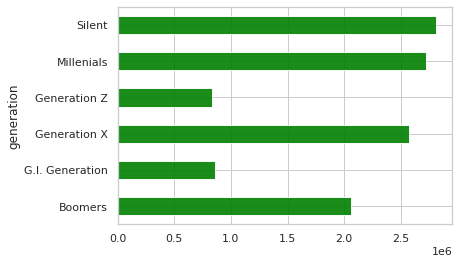

In [227]:
gdp = uk_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100

percentage = gdp.apply(percent)

print("The population percentage per age is listed below")
print(percentage)
gdp.plot(kind = 'barh', alpha = 0.9, color = 'green')

The suicide by generation is listed below
generation
Boomers            46608
G.I. Generation    14159
Generation X       34607
Generation Z          94
Millenials         10075
Silent             31262
Name: suicides_no, dtype: int64
------------------------------------
The percentage suicide by generation is listed below
generation
Boomers            34.068930
G.I. Generation    10.349768
Generation X       25.296590
Generation Z        0.068711
Millenials          7.364497
Silent             22.851504
Name: suicides_no, dtype: float64


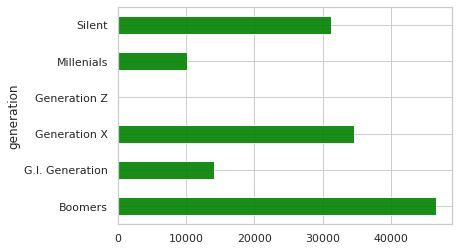

In [229]:
suicide = uk_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100

percentage = suicide.apply(percent)

print("The suicide by generation is listed below")
print(suicide)
print("------------------------------------")
print("The percentage suicide by generation is listed below")
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color = 'green')

------------------------------------
The population percentage per generation is listed below
generation
Boomers            26.574689
G.I. Generation     7.517709
Generation X       23.700295
Generation Z        3.717114
Millenials         16.272925
Silent             22.217268
Name: population, dtype: float64


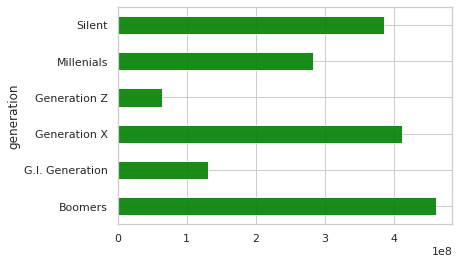

In [230]:
population = uk_data.groupby('generation')['population'].sum()
def percent(x):
    return x / population.sum() * 100

percentage = population.apply(percent)

# print("The population per age is listed below")
# print(population)
print("------------------------------------")
print("The population percentage per generation is listed below")
print(percentage)
population.plot(kind = 'barh', alpha = 0.9, color = 'green')

sex
female    51.157036
male      48.842964
Name: population, dtype: float64


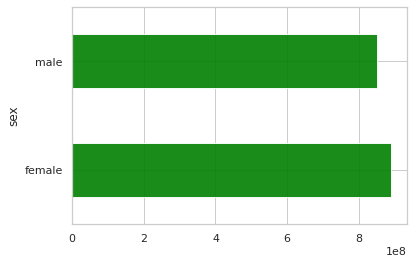

In [231]:
sex_by_pop = uk_data.groupby('sex')['population'].sum()
def percent(x):
    return x / sex_by_pop.sum() * 100
percentage = sex_by_pop.apply(percent)
print(percentage)
sex_by_pop.plot(kind = 'barh', alpha = 0.9, color = 'green')

sex
female    23.893133
male      76.106867
Name: suicides_no, dtype: float64


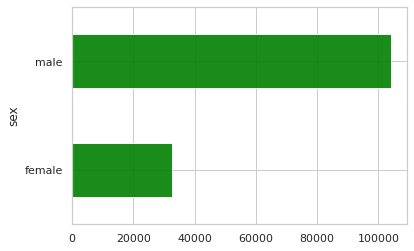

In [232]:
sex_by_suicide = uk_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x / sex_by_suicide.sum() * 100
percentage = sex_by_suicide.apply(percent)
print(percentage)
sex_by_suicide.plot(kind = 'barh', alpha = 0.9, color = 'green')

sex
female    50.0
male      50.0
Name: gdp_per_capita, dtype: float64


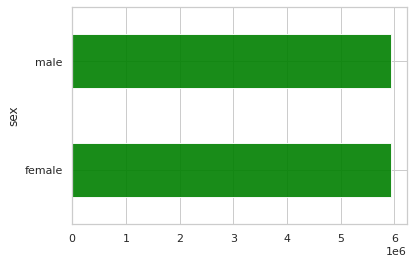

In [233]:
gdp = uk_data.groupby('sex')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind = 'barh', alpha = 0.9, color = 'green')

sex
female    50.0
male      50.0
Name: hdi_for_year, dtype: float64


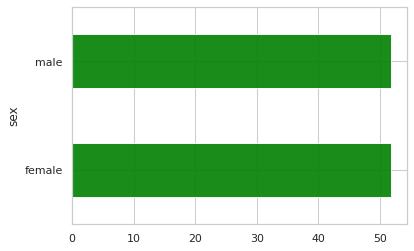

In [234]:
hdi = uk_data.groupby('sex')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind = 'barh', alpha = 0.9, color = 'green')

The population per age is listed below
age
15-24 years    248475645.0
25-34 years    265595420.0
35-54 years    497966295.0
5-14 years     227418049.0
55-74 years    362694144.0
75+ years      136618227.0
Name: population, dtype: float64
------------------------------------
The population percentage per age is listed below
age
15-24 years    14.290329
25-34 years    15.274922
35-54 years    28.639034
5-14 years     13.079265
55-74 years    20.859263
75+ years       7.857186
Name: population, dtype: float64


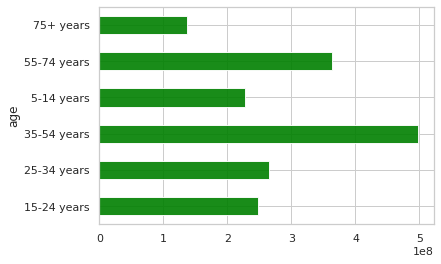

In [235]:
population = uk_data.groupby('age')['population'].sum()
def percent(x):
    return x / population.sum() * 100

percentage = population.apply(percent)

print("The population per age is listed below")
print(population)
print("------------------------------------")
print("The population percentage per age is listed below")
print(percentage)
population.plot(kind = 'barh', alpha = 0.9, color = 'green')

The suicide per age is listed below
age
15-24 years    2034
25-34 years    2160
35-54 years    2102
5-14 years      163
55-74 years     691
75+ years       171
Name: suicides_no, dtype: int64
------------------------------------
The suicide percentage per age is listed below
age
15-24 years    27.783090
25-34 years    29.504166
35-54 years    28.711925
5-14 years      2.226472
55-74 years     9.438601
75+ years       2.335746
Name: suicides_no, dtype: float64


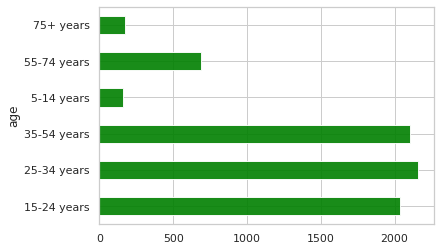

In [237]:
suicide = south_africa_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100

percentage = suicide.apply(percent)

print("The suicide per age is listed below")
print(suicide)
print("------------------------------------")
print("The suicide percentage per age is listed below")
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color = 'green')

The suicide per generation is listed below
generation
Boomers            46608
G.I. Generation    14159
Generation X       34607
Generation Z          94
Millenials         10075
Silent             31262
Name: suicides_no, dtype: int64
------------------------------------
The suicide per age is listed below
generation
Boomers            34.068930
G.I. Generation    10.349768
Generation X       25.296590
Generation Z        0.068711
Millenials          7.364497
Silent             22.851504
Name: suicides_no, dtype: float64


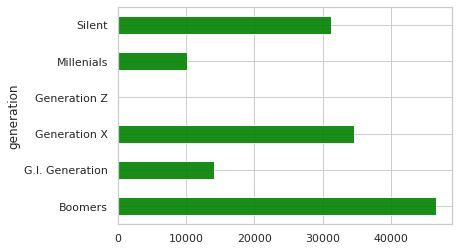

In [242]:
suicide = uk_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100

percentage = suicide.apply(percent)

print("The suicide per generation is listed below")
print(suicide)
print("------------------------------------")
print("The suicide per age is listed below")
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color = 'green')

The suicide per generation is listed below
generation
Boomers            15.458
G.I. Generation     9.508
Generation X       25.538
Generation Z        9.034
Millenials         23.220
Silent             20.862
Name: hdi_for_year, dtype: float64
------------------------------------
The suicide per age is listed below
generation
Boomers            14.917970
G.I. Generation     9.175835
Generation X       24.645821
Generation Z        8.718394
Millenials         22.408801
Silent             20.133179
Name: hdi_for_year, dtype: float64


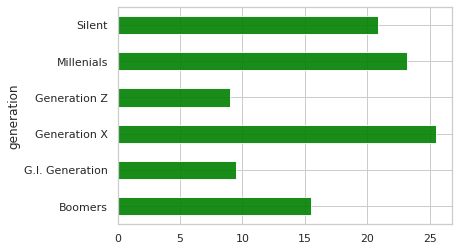

In [286]:
hdi = uk_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100

percentage = hdi.apply(percent)

print("The suicide per generation is listed below")
print(hdi)
print("------------------------------------")
print("The suicide per age is listed below")
print(percentage)
hdi.plot(kind = 'barh', alpha = 0.9, color = 'green')

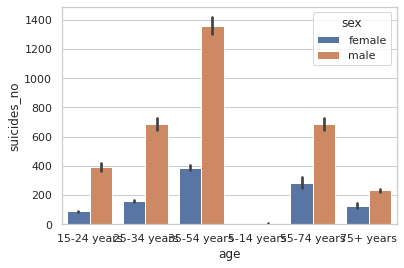

In [99]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="suicides_no", hue="sex", data=uk_data)

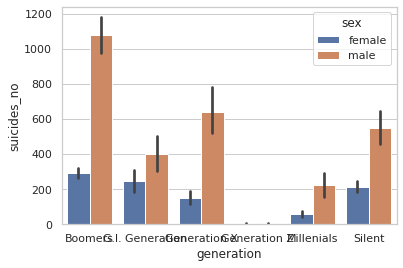

In [100]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="suicides_no", hue="sex", data=uk_data)

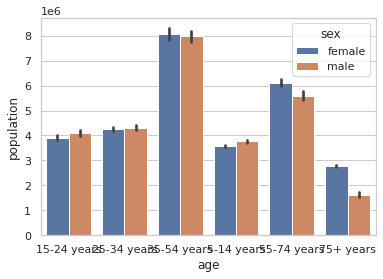

In [101]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="population", hue="sex", data=uk_data)

generation
Boomers            26.574689
G.I. Generation     7.517709
Generation X       23.700295
Generation Z        3.717114
Millenials         16.272925
Silent             22.217268
Name: population, dtype: float64


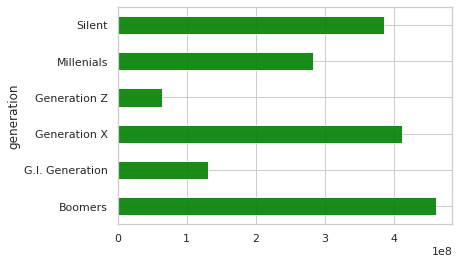

In [243]:
population = uk_data.groupby('generation')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind = 'barh', alpha = 0.9, color = 'green')

generation
Boomers            17.369250
G.I. Generation     7.229155
Generation X       21.687211
Generation Z        7.049339
Millenials         22.960785
Silent             23.704261
Name: gdp_per_capita, dtype: float64


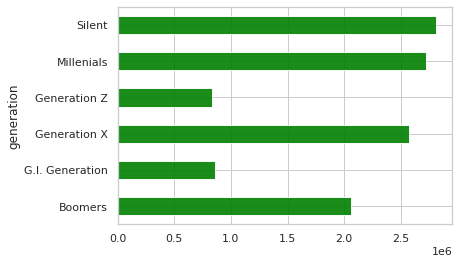

In [240]:
gdp = uk_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind = 'barh', alpha = 0.9, color = 'green')

generation
Boomers            14.917970
G.I. Generation     9.175835
Generation X       24.645821
Generation Z        8.718394
Millenials         22.408801
Silent             20.133179
Name: hdi_for_year, dtype: float64


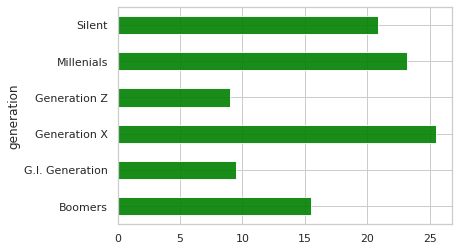

In [239]:
hdi = uk_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind = 'barh', alpha = 0.9, color = 'green')

# Inferential Statistics

In [105]:
uk_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,4.674107e+06,7.502473,0.278548,1.816067e+12,31908.354839,367.755376
std,8.956318,1.902560e+06,6.113924,0.405389,7.820394e+11,12736.016607,379.698095
min,1985.000000,1.202838e+06,0.000000,0.000000,4.892852e+11,9231.000000,0.000000
25%,1992.000000,3.620903e+06,2.812500,0.000000,1.140490e+12,20927.000000,97.000000
50%,2000.000000,4.121212e+06,4.845000,0.000000,1.647951e+12,29508.000000,236.000000
75%,2008.000000,5.810017e+06,12.407500,0.837000,2.619700e+12,44491.000000,542.500000
max,2015.000000,8.881944e+06,23.990000,0.907000,3.074360e+12,53576.000000,1743.000000


In [106]:
data_1 = uk_data.sex
data_2 = uk_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=577.295, p=0.000
Probably different distributions


In [107]:
data_1 = uk_data.generation
data_2 = uk_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=561.946, p=0.000
Probably different distributions


In [108]:
data_1 = uk_data.generation
data_2 = uk_data.sex
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=578.141, p=0.000
Probably different distributions


In [109]:
data_1 = uk_data.hdi_for_year
data_2 = uk_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.003, p=0.952
Probably the same distribution


In [110]:
data_1 = uk_data.gdp_per_capita
data_2 = uk_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.056, p=0.277
Probably the same distribution


-----------------------------------------------------------------------------------------------------

## United States Of America...North America

United States, officially United States of America, abbreviated U.S. or U.S.A., byname America, country in North America, a federal republic of 50 states. The United States which is made up of 51% and 48.9% has a population of 8,052,993,188. The country has a growing population of 0.02% annually, gross domestic products per capita of #14,608,296 and an annual average increase of GDP per capita of 0.1% which shows economic viability. The ages exposed to suicide include 35-54(36%), 55-74(21%) and 25-34(17.6%). A proper investigation reveals that suicide rate by gender is 79% and 20.6%, male and female respectively.Also, the suicide rate was on the low rate not until in 2001 when there was an increase by 0.1% on the average yearly. The question is

a. what could have caused the increase in suicide rate
b. what are the possible recommendation to curb the high rate of suicide in United States of America


The data reveal that between 1901 and 1945, there was an increase in gdp per capita from 8% to 23% and population increased also from 5% to 19%. However, we see an increase in suicide from 8% to 22%. between 1945 and 1964, we see a decrease in GDP per capita from 23% to 17%. The reason for the decrease is not far from the fact that there was an increase in population previously. Just as the country economy experienced a fall in GDP per capita also experienced a rise in suicide rate from 22% to 34% so also a decrease in Human development index from 20% to 14%. The male citizenry could not meet up with the responsibility hence depression and suicide. 

when GDP per capita increased from 17% to 22% between 1965 to 1980 and population decreased from 28% to 24%, there was a decrease in suicide from 34% to 24%. Also, when population decreased from 18% to 4% in generation Z, there was a decrease in suicide from 10% to 0% even when GDP per capita decreased from 22% to 6%. 

One possible reason for increase in suicide rate even when there is an increase in GDP per capita and decrease in population is the drop in HDI for the year from 21.9% to 8.5% is drop in quality health facilities and education which must have led to poor health services and then suicide. The population is sensitive to poor health infrastructure and education and when these are not available, there is every tendency that they fall ill easily, depressed and then suicide.

RECOMMENDATION
a. Attention should be given to the health, education and wellness of the population as the population is very sensitive and responsive to it. Quality health policy and implementation should be executed as this will go a long way to preserve the population




In [111]:
usa_data = (new_dataset[new_dataset['country'] == 'United States'])
usa_data.head(2)

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
26848,United States,1985,male,75+ years,4064000.0,53.57,0.841,4346734000000,19693,G.I. Generation,2177,elderly
26849,United States,1985,male,55-74 years,17971000.0,29.50,0.841,4346734000000,19693,G.I. Generation,5302,full_adult


In [112]:
usa_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,2.165061e+07,13.819812,0.287613,1.051071e+13,39269.612903,2779.604839
std,8.956318,9.448630e+06,13.229875,0.417587,4.204691e+12,12334.117581,2752.716420
min,1985.000000,4.064000e+06,0.260000,0.000000,4.346734e+12,19693.000000,50.000000
25%,1992.000000,1.818545e+07,3.972500,0.000000,6.539299e+12,27760.000000,558.750000
50%,2000.000000,2.037547e+07,6.890000,0.000000,1.028478e+13,39218.000000,2193.000000
75%,2008.000000,2.261694e+07,23.305000,0.876000,1.447764e+13,51585.000000,4145.500000
max,2015.000000,4.380521e+07,58.950000,0.915000,1.812071e+13,60387.000000,11767.000000


year
1985    2.740530
1986    2.768218
1987    2.795471
1988    2.822849
1989    2.849345
1990    2.855121
1991    2.892404
1992    2.924818
1993    2.956189
1994    2.987500
1995    3.019163
1996    3.054345
1997    3.085244
1998    3.120582
1999    3.150581
2000    3.256087
2001    3.295588
2002    3.336959
2003    3.365292
2004    3.396861
2005    3.428182
2006    3.463868
2007    3.484699
2008    3.505769
2009    3.540622
2010    3.573854
2011    3.604580
2012    3.635785
2013    3.666773
2014    3.696905
2015    3.725819
Name: population, dtype: float64


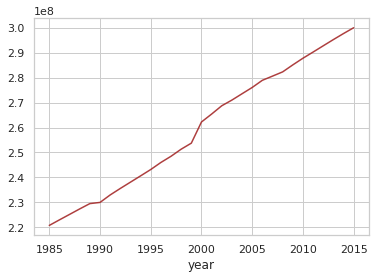

In [113]:
year_by_population = usa_data.groupby('year')['population'].sum()
def percent(x):
    return x / year_by_population.sum() * 100
percentage = year_by_population.apply(percent)
print(percentage)
year_by_population.plot(kind = 'line', alpha = 0.9, color='brown')

year
1985    1.617684
1986    1.691203
1987    1.776881
1988    1.897798
1989    2.025205
1990    2.136101
1991    2.177092
1992    2.280348
1993    2.373254
1994    2.495158
1995    2.589049
1996    2.704874
1997    2.845835
1998    2.970696
1999    3.127428
2000    3.221567
2001    3.287283
2002    3.355217
2003    3.488538
2004    3.685604
2005    3.895567
2006    4.079819
2007    4.237455
2008    4.282060
2009    4.153503
2010    4.270642
2011    4.390820
2012    4.531945
2013    4.642841
2014    4.808035
2015    4.960496
Name: gdp_per_capita, dtype: float64


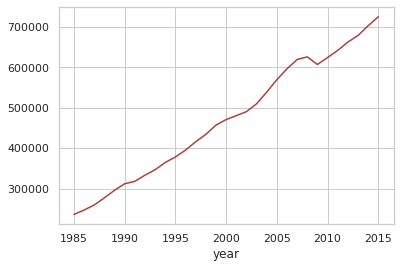

In [114]:
year_by_gdp = usa_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print(percentage)
year_by_gdp.plot(kind = 'line', alpha = 0.9, color='brown')

year
1985     9.432481
1986     0.000000
1987     0.000000
1988     0.000000
1989     0.000000
1990     9.634365
1991     0.000000
1992     0.000000
1993     0.000000
1994     0.000000
1995     9.825034
1996     0.000000
1997     0.000000
1998     0.000000
1999     0.000000
2000     9.903544
2001     0.000000
2002     0.000000
2003     0.000000
2004     0.000000
2005    10.060565
2006     0.000000
2007     0.000000
2008     0.000000
2009     0.000000
2010    10.195155
2011    10.217586
2012    10.228802
2013    10.240018
2014    10.262450
2015     0.000000
Name: hdi_for_year, dtype: float64


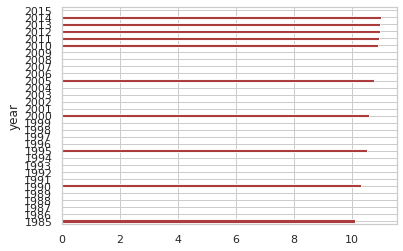

In [244]:
year_by_hdi = usa_data.groupby('year')['hdi_for_year'].sum()
def percent(x):
    return x / year_by_hdi.sum() * 100
percentage = year_by_hdi.apply(percent)
print(percentage)
year_by_hdi.plot(kind = 'barh', alpha = 0.9, color='brown')

sex
female    51.07629
male      48.92371
Name: population, dtype: float64


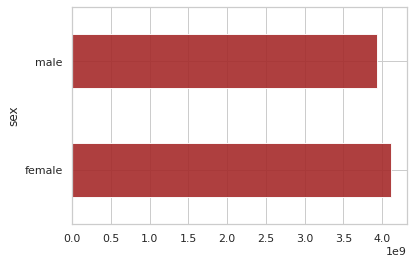

In [246]:
population = usa_data.groupby('sex')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind = 'barh', alpha = 0.9, color='brown')

sex
female    20.676433
male      79.323567
Name: suicides_no, dtype: float64


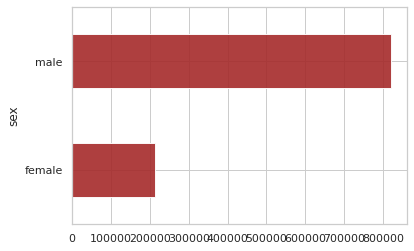

In [247]:
suicide = usa_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color='brown')

sex
female    50.0
male      50.0
Name: gdp_per_capita, dtype: float64


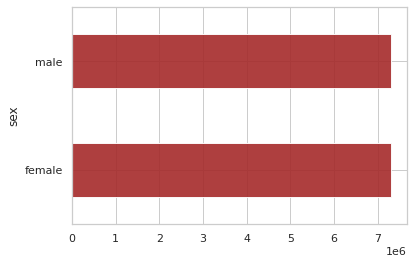

In [248]:
gdp = usa_data.groupby('sex')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind = 'barh', alpha = 0.9, color='brown')

year
1985    2.847740
1986    2.987583
1987    2.977042
1988    2.938841
1989    2.922400
1990    2.987873
1991    2.977719
1992    2.946868
1993    3.006152
1994    3.009923
1995    3.024333
1996    2.986326
1997    2.951317
1998    2.955282
1999    2.822305
2000    2.837779
2001    2.960021
2002    3.060406
2003    3.044159
2004    3.136131
2005    3.155570
2006    3.219689
2007    3.345799
2008    3.484482
2009    3.568621
2010    3.710011
2011    3.820842
2012    3.926063
2013    3.978964
2014    4.136215
2015    4.273544
Name: suicides_no, dtype: float64


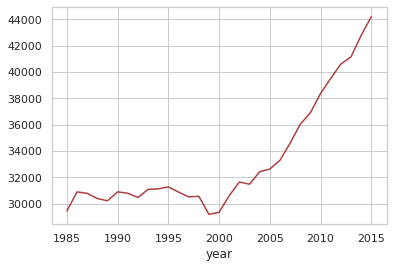

In [249]:
suicide = usa_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind = 'line', alpha = 0.9, color='brown')

age
15-24 years    15.375935
25-34 years    15.863186
35-54 years    29.445856
5-14 years     14.967583
55-74 years    18.135833
75+ years       6.211606
Name: population, dtype: float64


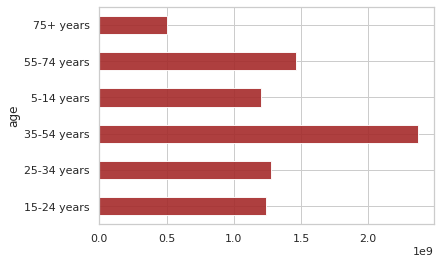

In [250]:
population = usa_data.groupby('age')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind = 'barh', alpha = 0.9, color='brown')

age
15-24 years    13.701859
25-34 years    17.605871
35-54 years    36.838705
5-14 years      0.862949
55-74 years    21.737638
75+ years       9.252978
Name: suicides_no, dtype: float64


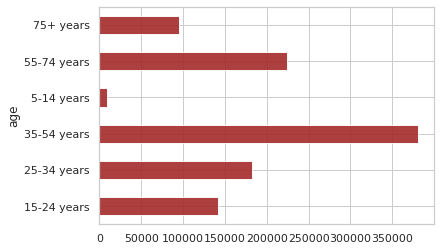

In [251]:
suicide = usa_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color='brown')

age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: gdp_per_capita, dtype: float64


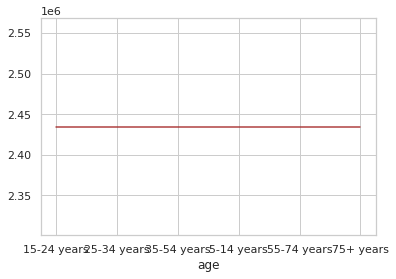

In [122]:
year_by_population = usa_data.groupby('age')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_population.sum() * 100
percentage = year_by_population.apply(percent)
print(percentage)
year_by_population.plot(kind = 'line', alpha = 0.9, color='brown')

generation
Boomers            28.059217
G.I. Generation     5.729220
Generation X       24.167369
Generation Z        4.618940
Millenials         18.396775
Silent             19.028480
Name: population, dtype: float64


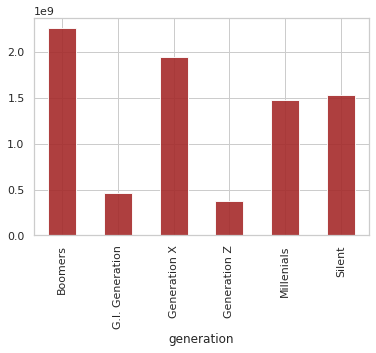

In [252]:
population = usa_data.groupby('generation')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind = 'bar', alpha = 0.9, color='brown')

generation
Boomers            17.509202
G.I. Generation     8.179174
Generation X       22.145827
Generation Z        6.712966
Millenials         22.330216
Silent             23.122615
Name: gdp_per_capita, dtype: float64


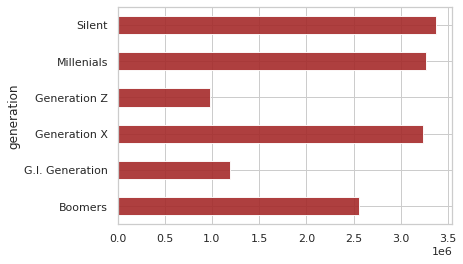

In [253]:
gdp = usa_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind = 'barh', alpha = 0.9, color='brown')

generation
Boomers            14.967474
G.I. Generation     9.643712
Generation X       24.831763
Generation Z        8.524002
Millenials         21.990429
Silent             20.042620
Name: hdi_for_year, dtype: float64


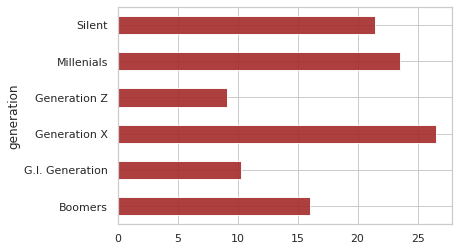

In [254]:
hdi = usa_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind = 'barh', alpha = 0.9, color='brown')

generation
Boomers            34.299569
G.I. Generation     8.690897
Generation X       24.535862
Generation Z        0.268759
Millenials         10.060995
Silent             22.143919
Name: suicides_no, dtype: float64


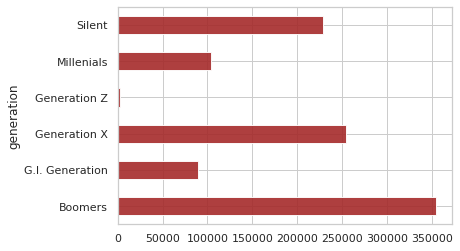

In [255]:
suicide = usa_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind = 'barh', alpha = 0.9, color='brown')

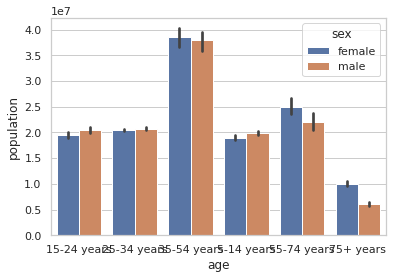

In [127]:
 sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="population", hue="sex", data=usa_data)

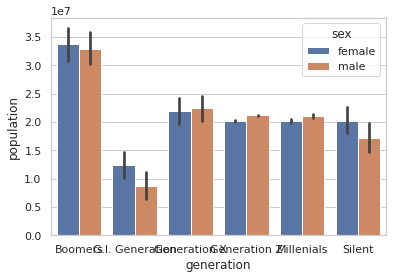

In [128]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="population", hue="sex", data=usa_data)

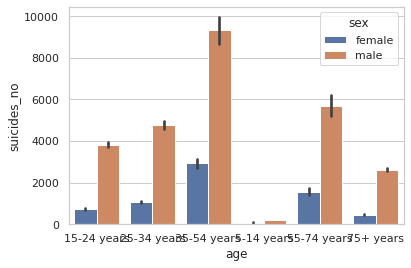

In [129]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="suicides_no", hue="sex", data=usa_data)

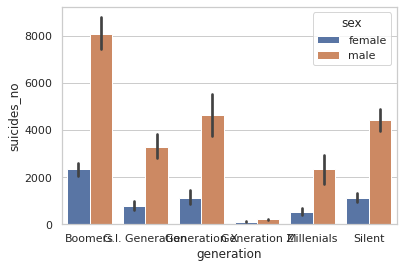

In [130]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="suicides_no", hue="sex", data=usa_data)

------------------------------------------------------------------

# Inferential Statistics

In [131]:
usa_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,2.165061e+07,13.819812,0.287613,1.051071e+13,39269.612903,2779.604839
std,8.956318,9.448630e+06,13.229875,0.417587,4.204691e+12,12334.117581,2752.716420
min,1985.000000,4.064000e+06,0.260000,0.000000,4.346734e+12,19693.000000,50.000000
25%,1992.000000,1.818545e+07,3.972500,0.000000,6.539299e+12,27760.000000,558.750000
50%,2000.000000,2.037547e+07,6.890000,0.000000,1.028478e+13,39218.000000,2193.000000
75%,2008.000000,2.261694e+07,23.305000,0.876000,1.447764e+13,51585.000000,4145.500000
max,2015.000000,4.380521e+07,58.950000,0.915000,1.812071e+13,60387.000000,11767.000000


In [132]:
data_1 = usa_data.generation
data_2 = usa_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=561.946, p=0.000
Probably different distributions


In [133]:
data_1 = usa_data.sex
data_2 = usa_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=577.295, p=0.000
Probably different distributions


In [134]:
data_1 = usa_data.generation
data_2 = usa_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=561.946, p=0.000
Probably different distributions


In [135]:
data_1 = usa_data.gdp_per_capita
data_2 = usa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.044, p=0.398
Probably the same distribution


In [136]:
data_1 = usa_data.population
data_2 = usa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.449, p=0.000
Probably different distributions


In [137]:
data_1 = usa_data.hdi_for_year
data_2 = usa_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.040, p=0.443
Probably the same distribution


# Brazil..S.America

Brazil, officially the Federative Republic of Brazil, is the largest country in both South America and Latin America. According to our finding, it has a population of 4,855,866,935. It is populated with 49% male and 51% female. However, suicide committed by the male gender is 78% and that of the female is 21.6%. From the report available, the population by age include, 35-54(25.4%), 5-14(21.9%), 15-24(20.9%), 25-34(18.4%), 55-74(11%) and 75+(2%).

Also, from our data, we discovered that as at 1985, the suicide rate moved from 1.8% in 1985 to 4.92% in 2015. The question is

a. What could have caused it

b. possible solutions to curb the increase/

From our analysis, we discovered that there is a positive correlation between the population and suicide rate in brazil. Also, there is a correlation between GDP per capita and suicide rate in Brazil. As GDP per capita increased from 6.8% to 21.8% between 1901 and 1980, population also increased from 3% to 31%. Also, as GDP per capita fell from 23% to 9% and as population decreased from 26% to 6% between 1981 and 2012, suicide rate decreased from 17% to 0%. 

The reason for the increase is not far fetched as the human capital development of Brazil has remained the same @ 8% even when there is an increase in GDP per capita and increase in population. With the total working population between ages 15-24year, 25-34years and 35-54years of 80% and a drop in GDP per capita by 9%, with a constant HDI per year, there is every tendency that the population may not be able to fend for the health and educational need and demand of the population hence the depression and high rate of suicide. 

RECOMMENDATION
There should be policies and proper implementation that will improve the Living standard of the working population as they contribute so much to the growth in the GDP of the nation.



In [138]:
brazil_data = (new_dataset[new_dataset['country'] == 'Brazil'])
brazil_data.head(2)

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
4172,Brazil,1985,male,75+ years,840300.0,15.35,0.576,222942790435,1898,G.I. Generation,129,elderly
4173,Brazil,1985,male,55-74 years,5364900.0,9.97,0.576,222942790435,1898,G.I. Generation,535,full_adult


year
1985    2.419206
1986    2.445925
1987    2.529244
1988    2.588527
1989    2.647608
1990    2.705622
1991    2.765224
1992    2.821342
1993    2.875057
1994    2.928042
1995    2.981483
1996    3.034396
1997    3.087515
1998    3.140885
1999    3.194380
2000    3.247796
2001    3.298511
2002    3.351694
2003    3.405966
2004    3.459428
2005    3.510722
2006    3.562014
2007    3.609757
2008    3.654617
2009    3.697819
2010    3.740243
2011    3.781979
2012    3.821821
2013    3.860281
2014    3.897898
2015    3.934996
Name: population, dtype: float64


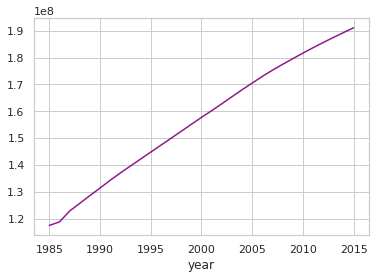

In [256]:
population = brazil_data.groupby('year')['population'].sum()
def percent(x):
    return x/ population.sum()*100
percentage = population.apply(percent)
print(percentage)
population.plot(kind='line', alpha = 0.9, color='purple')

year
1985    1.865736
1986    1.884711
1987    2.061665
1988    1.970761
1989    1.969437
1990    2.119472
1991    2.275245
1992    2.297750
1993    2.430575
1994    2.601792
1995    2.884212
1996    2.955700
1997    3.040867
1998    3.054547
1999    2.871415
2000    2.984383
2001    3.402276
2002    3.396539
2003    3.459201
2004    3.528041
2005    3.763685
2006    3.802959
2007    3.907543
2008    4.052724
2009    4.124212
2010    4.160838
2011    4.334261
2012    4.542987
2013    4.639187
2014    4.691258
2015    4.926019
Name: suicides_no, dtype: float64


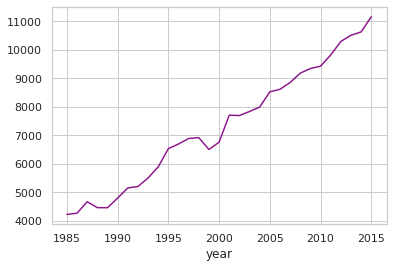

In [259]:
suicide = brazil_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x/ suicide.sum()*100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='line', alpha = 0.9, color='purple')

year
1985    1.005105
1986    1.195217
1987    1.267767
1988    1.391684
1989    1.752844
1990    1.861933
1991    2.377725
1992    1.548434
1993    1.660700
1994    2.078523
1995    2.813553
1996    3.056091
1997    3.119638
1998    2.998899
1999    2.046220
2000    2.200852
2001    1.849224
2002    1.652757
2003    1.787795
2004    2.109767
2005    2.769599
2006    3.390773
2007    4.220594
2008    5.059946
2009    4.915906
2010    6.439980
2011    7.543583
2012    7.034146
2013    6.985427
2014    6.871042
2015    4.994281
Name: gdp_per_capita, dtype: float64


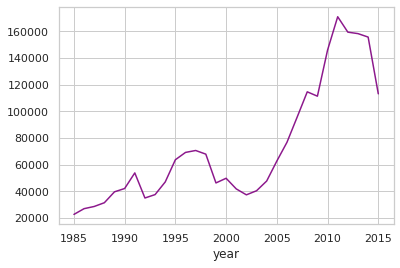

In [260]:
gdp = brazil_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x/ gdp.sum()*100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='line', alpha = 0.9, color='purple')

sex
female    50.770853
male      49.229147
Name: population, dtype: float64


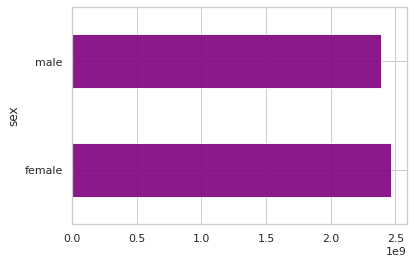

In [262]:
population = brazil_data.groupby('sex')['population'].sum()
def percent(x):
    return x/ population.sum()*100
percentage = population.apply(percent)
print(percentage)
population.plot(kind='barh', alpha = 0.9, color='purple')

sex
female    50.0
male      50.0
Name: gdp_per_capita, dtype: float64


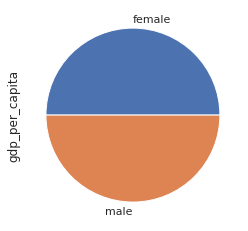

In [263]:
gdp = brazil_data.groupby('sex')['gdp_per_capita'].sum()
def percent(x):
    return x/ gdp.sum()*100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='pie')

sex
female    50.0
male      50.0
Name: hdi_for_year, dtype: float64


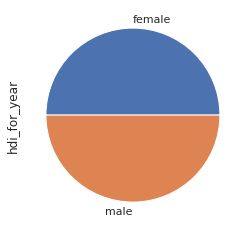

In [264]:
hdi = brazil_data.groupby('sex')['hdi_for_year'].sum()
def percent(x):
    return x/ hdi.sum()*100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind='pie')

age
15-24 years    20.934275
25-34 years    18.439844
35-54 years    25.449662
5-14 years     21.964421
55-74 years    11.122596
75+ years       2.089202
Name: population, dtype: float64


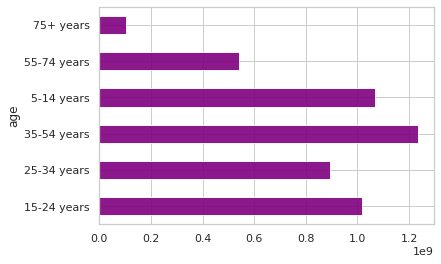

In [265]:
population = brazil_data.groupby('age')['population'].sum()
def percent(x):
    return x/ population.sum()*100
percentage = population.apply(percent)
print(percentage)
population.plot(kind='barh', alpha = 0.9, color='purple')

age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: gdp_per_capita, dtype: float64


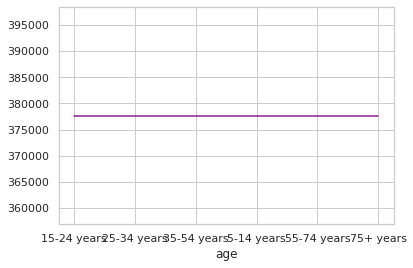

In [266]:
gdp = brazil_data.groupby('age')['gdp_per_capita'].sum()
def percent(x):
    return x/ gdp.sum()*100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='line', alpha = 0.9, color='purple')

generation
Boomers            1.129634e+09
G.I. Generation    1.022997e+08
Generation X       1.486935e+09
Generation Z       2.995697e+08
Millenials         1.269466e+09
Silent             5.681892e+08
Name: population, dtype: float64
generation
Boomers            23.262201
G.I. Generation     2.106626
Generation X       30.619975
Generation Z        6.168945
Millenials         26.141715
Silent             11.700540
Name: population, dtype: float64


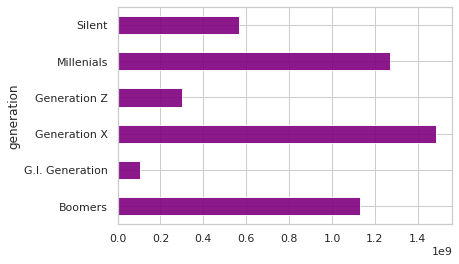

In [267]:
population = brazil_data.groupby('generation')['population'].sum()
def percent(x):
    return x/ population.sum()*100
percentage = population.apply(percent)
print(population)
print(percentage)
population.plot(kind='barh', alpha = 0.9, color='purple')

generation
Boomers            16.870900
G.I. Generation     6.808289
Generation X       21.858297
Generation Z        9.010817
Millenials         23.085640
Silent             22.366057
Name: gdp_per_capita, dtype: float64


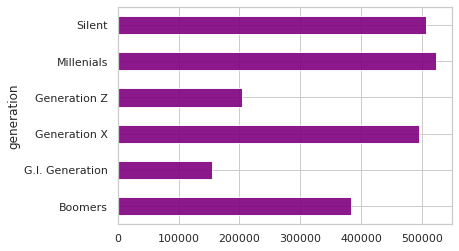

In [268]:
gdp = brazil_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x/ gdp.sum()*100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='barh', alpha = 0.9, color='purple')

year
1985    1.865736
1986    1.884711
1987    2.061665
1988    1.970761
1989    1.969437
1990    2.119472
1991    2.275245
1992    2.297750
1993    2.430575
1994    2.601792
1995    2.884212
1996    2.955700
1997    3.040867
1998    3.054547
1999    2.871415
2000    2.984383
2001    3.402276
2002    3.396539
2003    3.459201
2004    3.528041
2005    3.763685
2006    3.802959
2007    3.907543
2008    4.052724
2009    4.124212
2010    4.160838
2011    4.334261
2012    4.542987
2013    4.639187
2014    4.691258
2015    4.926019
Name: suicides_no, dtype: float64


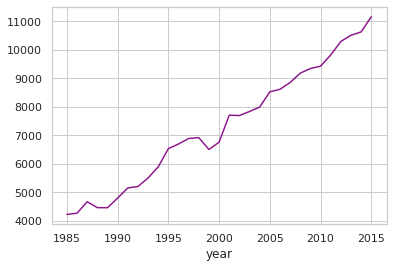

In [269]:
suicide = brazil_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x/ suicide.sum()*100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='line', alpha = 0.9, color='purple')

age
15-24 years    16.666667
25-34 years    16.666667
35-54 years    16.666667
5-14 years     16.666667
55-74 years    16.666667
75+ years      16.666667
Name: hdi_for_year, dtype: float64


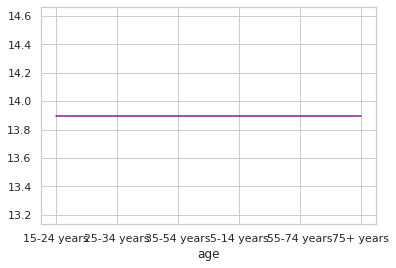

In [270]:
hdi = brazil_data.groupby('age')['hdi_for_year'].sum()
def percent(x):
    return x/ hdi.sum()*100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind='line', alpha = 0.9, color='purple')

generation
Boomers            70364
G.I. Generation     7811
Generation X       70971
Generation Z        1073
Millenials         38753
Silent             37641
Name: suicides_no, dtype: int64
-------------------
generation
Boomers            31.050293
G.I. Generation     3.446846
Generation X       31.318150
Generation Z        0.473494
Millenials         17.100961
Silent             16.610256
Name: suicides_no, dtype: float64
-------------------


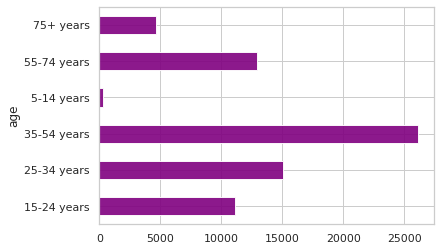

In [181]:
gen_by_suicide = brazil_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x/ gen_by_suicide.sum()*100
 
percentage = gen_by_suicide.apply(percent)

print(gen_by_suicide)
print("-------------------")
print(percentage)
print("-------------------")
year_by_pop.plot(kind='barh', alpha = 0.9, color='purple')

----------------------------------------------------------------

age
15-24 years    19.679807
25-34 years    23.182253
35-54 years    35.240697
5-14 years      1.336640
55-74 years    16.572747
75+ years       3.987856
Name: suicides_no, dtype: float64


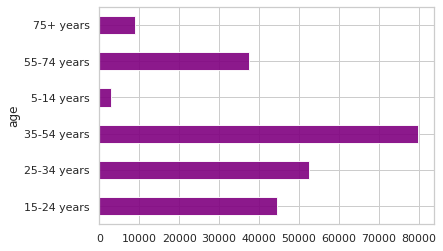

In [271]:
suicide = brazil_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x/ suicide.sum()*100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='barh', alpha = 0.9, color='purple')

sex
female    21.629386
male      78.370614
Name: suicides_no, dtype: float64


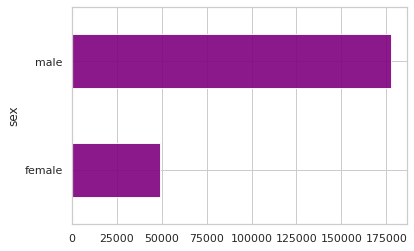

In [272]:
suicide = brazil_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x/ suicide.sum()*100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='barh', alpha = 0.9, color='purple')

# Inferential Statistics

In [154]:
brazil_data.describe()

,year,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,suicides_no
count,372.000000,3.720000e+02,372.000000,372.000000,3.720000e+02,372.000000,372.000000
mean,2000.000000,1.305401e+07,5.846022,0.224161,1.022561e+12,6091.483871,609.174731
std,8.956318,6.655806e+06,5.623846,0.327140,7.438984e+11,3711.626223,652.567097
min,1985.000000,6.556210e+05,0.150000,0.000000,2.229428e+11,1898.000000,25.000000
25%,1992.000000,8.193910e+06,2.152500,0.000000,4.619518e+11,3310.000000,99.500000
50%,2000.000000,1.478517e+07,2.800000,0.000000,6.693167e+11,4490.000000,348.000000
75%,2008.000000,1.749273e+07,9.855000,0.648000,1.667020e+12,9283.000000,939.000000
max,2015.000000,2.846186e+07,23.920000,0.755000,2.616202e+12,14245.000000,3238.000000


In [155]:
data_1 = brazil_data.generation
data_2 = brazil_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=561.946, p=0.000
Probably different distributions


In [156]:
data_1 = brazil_data.sex
data_2 = brazil_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=577.295, p=0.000
Probably different distributions


In [157]:
data_1 = brazil_data.generation
data_2 = brazil_data.sex
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=578.141, p=0.000
Probably different distributions


In [158]:
data_1 = brazil_data.gdp_per_capita
data_2 = brazil_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.220, p=0.000
Probably different distributions


In [159]:
data_1 = brazil_data.population
data_2 = brazil_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.284, p=0.000
Probably different distributions


In [160]:
data_1 = brazil_data.hdi_for_year
data_2 = brazil_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.101, p=0.051
Probably the same distribution


# Australia

Australia, officially the Commonwealth of Australia, is a sovereign country comprising the mainland of the Australian continent, the island of Tasmania, and numerous smaller islands. The country boast of a population of 542,307,675 with 50% females and 49.6% males.While the GDP per capita grew from 1.3% to 6.1%, the suicide rate increased from 2.7% to 4.3%. The data also revealed that the ages most affected by suicide are 25-34years(29.8%) and 35-54years(33%). It appears that they also are the most affected by the low GDP per capita rate and also HDI rate(39%). The increase in suicide rate is mostly felt between 2006 and 2015(from 3% - 4.3%) in Generation Z generation even when the suicide rate is 0%

From our observation and dataset given, the increase in the suicide rate was carried out by citizens between 15-24years. The reason is not far from the fact that the citizens between that age bracket are school-leavers, undergraduates and graduates. Also, from the decrease in HDI per year, the reason is poor educational system and also poor living standard. This can be traced to unemployment and also poor health facility.

RECOMMENDATION
Government and policy makers should come up with policies that will improve the economic system which will create jobs and better living and working standards. Also, better educational policies and health facilities should be created to meet with the working population for improved GDP per capita.

In [161]:
aus_data = (new_dataset[new_dataset['country'] == 'Australia'])
aus_data.head(2)

,country,year,sex,age,population,suicides/100k pop,hdi_for_year,gdp_for_year,gdp_per_capita,generation,suicides_no,age_category
1426,Australia,1985,male,75+ years,219000.0,30.59,0.0,180190994861,12374,G.I. Generation,67,elderly
1427,Australia,1985,male,25-34 years,1299100.0,27.48,0.0,180190994861,12374,Boomers,357,mid_youth


year
1985    2.684937
1986    2.730532
1987    2.774173
1988    2.823143
1989    2.870803
1990    2.914389
1991    2.952204
1992    2.987493
1993    3.018191
1994    3.051268
1995    3.091259
1996    3.137131
1997    3.175148
1998    3.212102
1999    3.252659
2000    3.295565
2001    3.342851
2002    3.386949
2003    3.430824
2004    3.476276
2006    3.523235
2007    3.638503
2008    3.709649
2009    3.785059
2010    3.843732
2011    3.850067
2012    3.915888
2013    3.982497
2014    4.042862
2015    4.100608
Name: population, dtype: float64


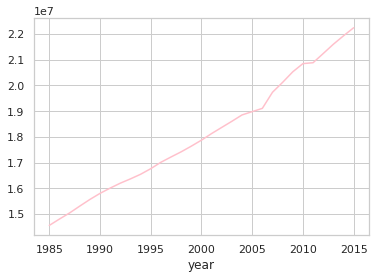

In [162]:
year_by_pop = aus_data.groupby('year')['population'].sum()
def percent(x):
    return x / year_by_pop.sum() * 100
percentage = year_by_pop.apply(percent)
print(percentage)
year_by_pop.plot(kind='line', alpha = 0.99, color = 'pink')

year
1985    2.654362
1986    2.915377
1987    3.086534
1988    3.097945
1989    2.946756
1990    3.140734
1991    3.263397
1992    3.210623
1993    2.906819
1994    3.256265
1995    3.095092
1996    3.460227
1997    3.774015
1998    3.754047
1999    3.548659
2000    3.410307
2001    3.505869
2002    3.307612
2003    3.075124
2004    3.015219
2006    3.019498
2007    3.179244
2008    3.338991
2009    3.333286
2010    3.451669
2011    3.411733
2012    3.679879
2013    3.719816
2014    4.123461
2015    4.317439
Name: suicides_no, dtype: float64


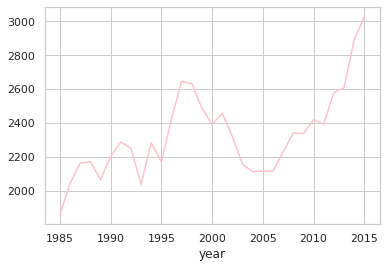

In [163]:
year_by_suicide = aus_data.groupby('year')['suicides_no'].sum()
def percent(x):
    return x / year_by_suicide.sum() * 100
percentage = year_by_suicide.apply(percent)
print(percentage)
year_by_suicide.plot(kind='line', alpha = 0.99, color = 'pink')

year
1985    1.258426
1986    1.249680
1987    1.277749
1988    1.565456
1989    1.954964
1990    1.999915
1991    2.066528
1992    2.039069
1993    1.935336
1994    1.979982
1995    2.227416
1996    2.392575
1997    2.566277
1998    2.328606
1999    2.239009
2000    2.361353
2001    2.121445
2002    2.183888
2003    2.548480
2004    3.300546
2006    3.967692
2007    4.390456
2008    5.320393
2009    4.589481
2010    5.581963
2011    6.790455
2012    7.390378
2013    7.409396
2014    6.794421
2015    6.168666
Name: gdp_per_capita, dtype: float64


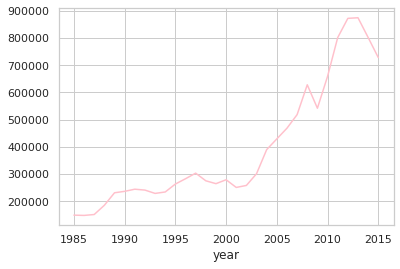

In [273]:
year_by_gdp = aus_data.groupby('year')['gdp_per_capita'].sum()
def percent(x):
    return x / year_by_gdp.sum() * 100
percentage = year_by_gdp.apply(percent)
print(percentage)
year_by_gdp.plot(kind='line', alpha = 0.99, color = 'pink')

sex
female    50.351168
male      49.648832
Name: population, dtype: float64


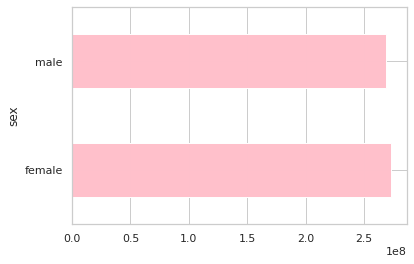

In [274]:
population = aus_data.groupby('sex')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind='barh', alpha = 0.99, color = 'pink')

sex
female    21.859623
male      78.140377
Name: suicides_no, dtype: float64


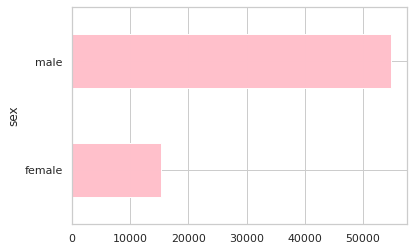

In [275]:
suicide = aus_data.groupby('sex')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='barh', alpha = 0.99, color = 'pink')

sex
female    50.0
male      50.0
Name: gdp_per_capita, dtype: float64


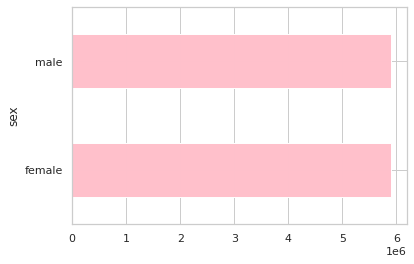

In [276]:
gdp = aus_data.groupby('sex')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='barh', alpha = 0.99, color = 'pink')

generation
Boomers            27.149866
G.I. Generation     5.236661
Generation X       25.725762
Generation Z        4.664782
Millenials         18.039131
Silent             19.183798
Name: population, dtype: float64


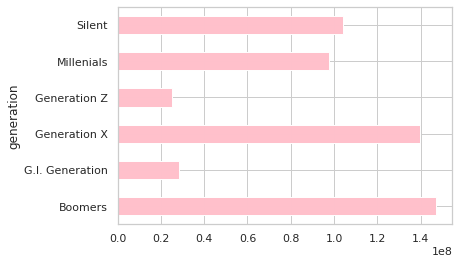

In [277]:
population = aus_data.groupby('generation')['population'].sum()
def percent(x):
    return x / population.sum() * 100
percentage = population.apply(percent)
print(percentage)
population.plot(kind='barh', alpha = 0.99, color = 'pink')

generation
Boomers            33.466931
G.I. Generation     6.670851
Generation X       29.882615
Generation Z        0.179715
Millenials          9.932821
Silent             19.867068
Name: suicides_no, dtype: float64


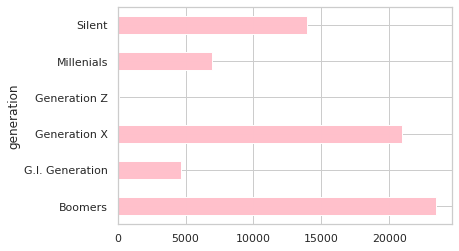

In [278]:
suicide = aus_data.groupby('generation')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='barh', alpha = 0.99, color = 'pink')

generation
Boomers            17.073158
G.I. Generation     6.791421
Generation X       21.500565
Generation Z        9.072602
Millenials         23.228197
Silent             22.334057
Name: gdp_per_capita, dtype: float64


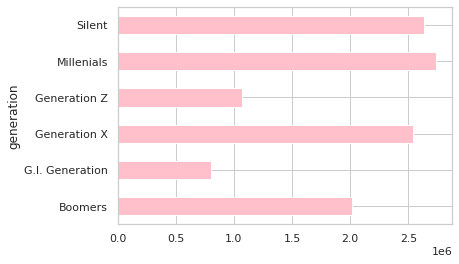

In [279]:
gdp = aus_data.groupby('generation')['gdp_per_capita'].sum()
def percent(x):
    return x / gdp.sum() * 100
percentage = gdp.apply(percent)
print(percentage)
gdp.plot(kind='barh', alpha = 0.99, color = 'pink')

generation
Boomers            14.550808
G.I. Generation     8.011504
Generation X       24.819684
Generation Z       10.629508
Millenials         23.205971
Silent             18.782525
Name: hdi_for_year, dtype: float64


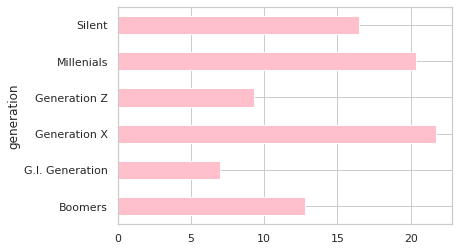

In [280]:
hdi = aus_data.groupby('generation')['hdi_for_year'].sum()
def percent(x):
    return x / hdi.sum() * 100
percentage = hdi.apply(percent)
print(percentage)
hdi.plot(kind='barh', alpha = 0.99, color = 'pink')

age
15-24 years    15.812069
25-34 years    21.443140
35-54 years    37.297999
5-14 years      0.456419
55-74 years    18.415085
75+ years       6.575288
Name: suicides_no, dtype: float64


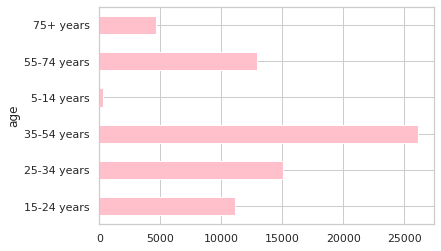

In [281]:
suicide = aus_data.groupby('age')['suicides_no'].sum()
def percent(x):
    return x / suicide.sum() * 100
percentage = suicide.apply(percent)
print(percentage)
suicide.plot(kind='barh', alpha = 0.99, color = 'pink')

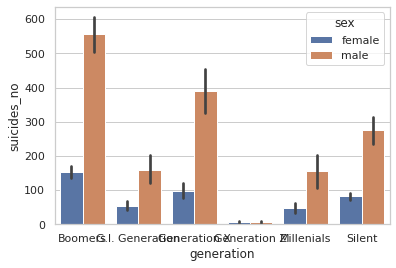

In [173]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="generation", y="suicides_no", hue="sex", data=aus_data)

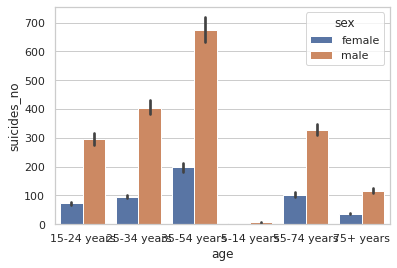

In [174]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="age", y="suicides_no", hue="sex", data=aus_data)

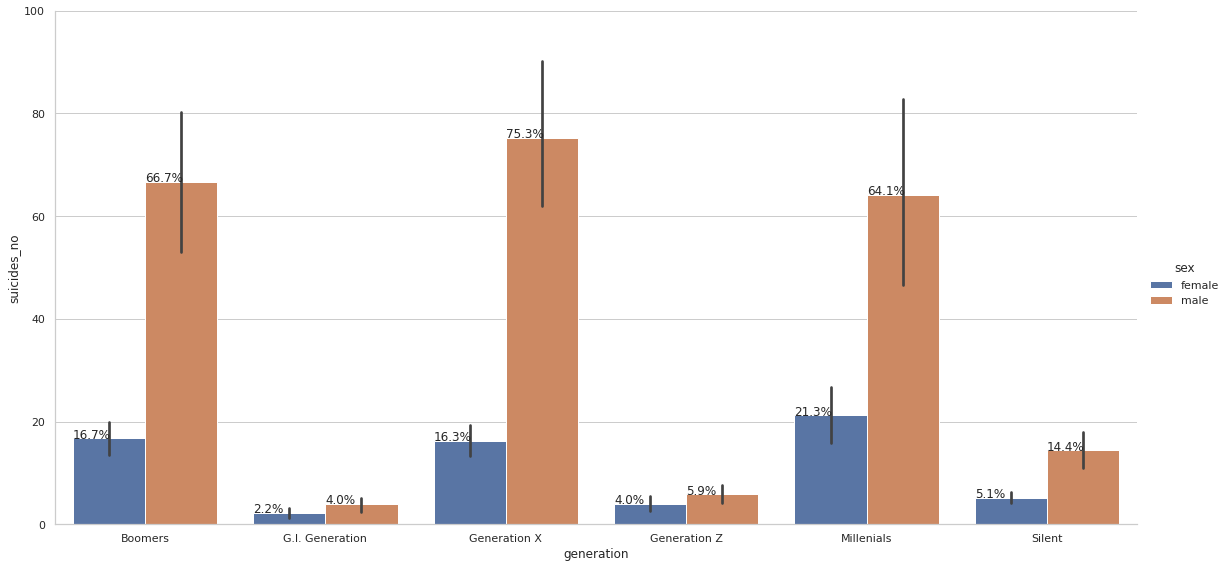

In [175]:
g = sns.catplot(x="generation", y="suicides_no", hue='sex', kind='bar', data=south_africa_data, height=8, aspect=2)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

# Inferential Statistics

In [291]:
data_1 = aus_data.generation
data_2 = aus_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=543.766, p=0.000
Probably different distributions


In [292]:
data_1 = aus_data.generation
data_2 = aus_data.sex
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=559.436, p=0.000
Probably different distributions


In [293]:
data_1 = aus_data.sex
data_2 = aus_data.age
stat, p = kruskal(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=558.647, p=0.000
Probably different distributions


In [294]:
data_1 = aus_data.population
data_2 = aus_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.557, p=0.000
Probably different distributions


In [295]:
data_1 = aus_data.hdi_for_year
data_2 = aus_data.suicides_no
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.046, p=0.388
Probably the same distribution


In [296]:
data_1 = aus_data.population
data_2 = aus_data.hdi_for_year
stat, p = spearmanr(data_1, data_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.181, p=0.001
Probably different distributions
